# 8장. Plotting and Visualization
도표나 시각화의 목적:
- 특이값을 찾아내거나
- 데이터의 변형 필요성
- 모델에 대한 아이디어 획득

주로 matplotlib를 통한 시각화에 촛점을 둘 것이다.
- python에서 matlab과 유사한 인터페이스를 지원하고자 개발된 모듈
- IPython과 통합된 다양한 기능을 지원하고 있다.
- 3D 시각화를 위한 matplot3d, 지도와 투영을 위한 basemap 등의 확장 toolkit이 있다.

아래 코드를 맨 위로 올린 이유는 figure의 figsize를 처음 설정하면 그 값이 notebook 전체에 적용되기 때문이다.

In [40]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [41]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/DataAnal')
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/DataAnal


## 8.1 A brief matplotlib API primer
Matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다. Matplotlib는 다음과 같은 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능을 제공한다.

- 라인 플롯(line plot)
- 스캐터 플롯(scatter plot)
- 컨투어 플롯(contour plot)
- 서피스 플롯(surface plot)
- 바 차트(bar chart)
- 히스토그램(histogram)
- 박스 플롯(box plot)

Matplotlib를 사용한 시각화 예제들을 보고 싶다면 Matplotlib 갤러리 웹사이트를 방문한다.
- http://matplotlib.org/gallery.html

---
#### pyplot vs. pylab
Matplotlib 패키지에는 pyplot과 pylab 라는 서브패키지가 존재한다.
- Matplotlib는 전체 패키지이고,  matplotlib.pyplot는 matplotlib에 있는 모듈로서 state-macine 인터페이스에서 암묵적으로 자동으로 figure와 axis를 생성하여 원하는 plot을 그리도록 해준다.
- pylab은 Matplotlib 라이브러리와 함께 같이 설치되며, 단일 namespace에서 numpy와 pyplot을 동시에 사용할 수 있도록 해주는 bulk module이다.
 - 즉, numpy + pyplot로서, interactive한 프로그래밍 환경에서 유용하다.
 - 편리한 점도 있지만, 쓸데 없이 무거워진다.

>plot을 정교하게 그리려면, figure와 subplot에 해당하는 axes를 먼저 정의해야 하는데, pyplot의 plot 만으로도 자동으로 생성하게 해준다. 그러나 정교한 작업을 위해서는 figure와 axes를 설정해줘야 한다.

이를 예로서 확인해보면:

1) pyplot 사용시

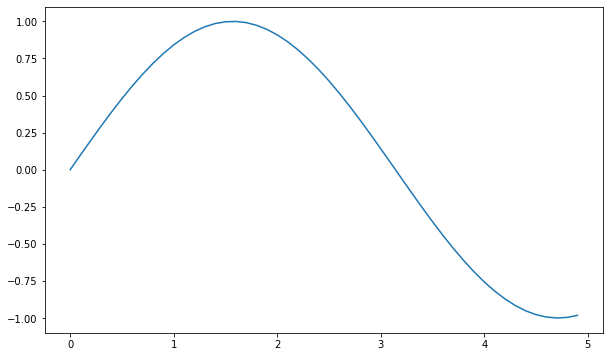

In [42]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.arange(0, 5, 0.1)
y = np.sin(x)

plt.plot(x, y) 
plt.show()

2) interactive 환경에서 pylab 사용시

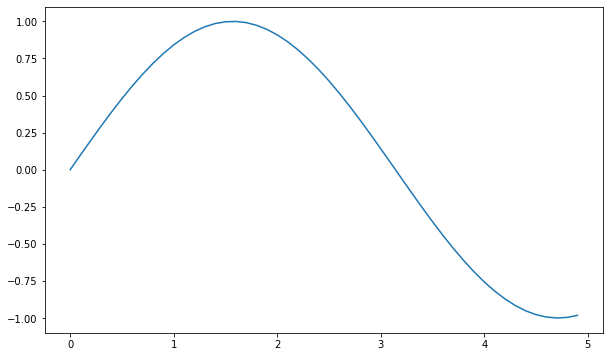

In [43]:
import pylab 
x = pylab.arange(0, 5, 0.1)
y = pylab.sin(x)

pylab.plot(x, y) 
pylab.show()

이 pylab 서브패키지는 matlab 이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용할 수 있도록 Matplotlib 의 하위 API를 포장(wrapping)한 명령어 집합을 제공한다. 간단한 시각화 프로그램을 만드는 경우에는 pylab 서브패키지의 명령만으로도 충분하다. 

`ipython --pylab` 명령으로, Ipython을 pylab 모드로 실행시키면, 다양한 GUI 백엔드를 지원할 수 있게 된다.

대게의 경우, interactive한 환경과 script 환경을 모두 사용하는 것이 일반적이므로, matplotlib 에서도 pylab을 권장하지 않는다. 따라서, 이후로 pylab을 사용하지 않고, pyplot을 사용한 것으로 한정하겠다.

In [44]:
%matplotlib inline

In [45]:
%pwd

'/content/drive/My Drive/Colab Notebooks/DataAnal'

이제 간단하게 line 하나를 그려보면:

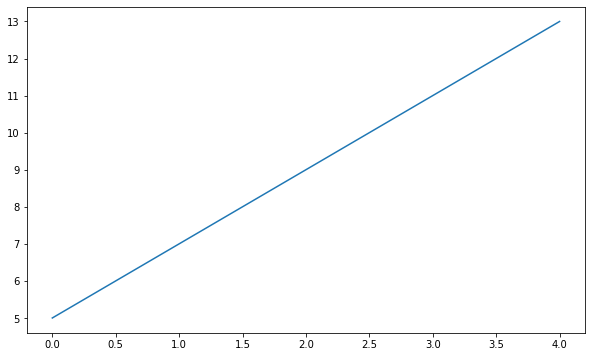

In [46]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.plot(np.arange(5, 15, 2))

In [47]:
plt.plot?

참고로, 아래는 `from matplotlib.pyplot import *` 를 하여 `import matplotlib.pyplot as plt`로 한 경우 plt가 생략된 문장으로 이해하자.

plot examples:
```
    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses
    plot(x1, y1, 'g^', x2, y2, 'g-')  # different styled 2 lines
```

다양한 arg를 갖는 경우 예:
```
    plot([1,2,3], [1,2,3], 'go-', label='line 1', linewidth=2)
    plot([1,2,3], [1,4,9], 'rs',  label='line 2')
    axis([0, 4, 0, 10])
    legend()
```

line style or marker:

```
================    ===============================
character           description
================    ===============================
``'-'``             solid line style
``'--'``            dashed line style
``'-.'``            dash-dot line style
``':'``             dotted line style
``'.'``             point marker
``','``             pixel marker
``'o'``             circle marker
``'v'``             triangle_down marker
``'^'``             triangle_up marker
``'<'``             triangle_left marker
``'>'``             triangle_right marker
``'1'``             tri_down marker
``'2'``             tri_up marker
``'3'``             tri_left marker
``'4'``             tri_right marker
``'s'``             square marker
``'p'``             pentagon marker
``'*'``             star marker
``'h'``             hexagon1 marker
``'H'``             hexagon2 marker
``'+'``             plus marker
``'x'``             x marker
``'D'``             diamond marker
``'d'``             thin_diamond marker
``'|'``             vline marker
``'_'``             hline marker
================    ===============================
```

The following color abbreviations are supported:
```
==========  ========
character   color
==========  ========
'b'         blue
'g'         green
'r'         red
'c'         cyan
'm'         magenta
'y'         yellow
'k'         black
'w'         white
==========  ========
```

### 8.1.1 Figures and Subplots
matplotlib에서 그래프는 Figure 객체 내에 존재한다. 그래프를 위한 새 Figure는 plt.figure를 사용하여 생성할 수 있다.

matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None):
- num : integer or string, optional, default: none. 
    - 일종의 figure의 고유id이며, None이 입력될 경우, 1부터 순차적으로 자동으로 늘어난다.
    - num이 입력되었고 이미 동일한 num을 갖는 figure 객체가 있다면, 이 객체를 호출한다.
    - str이 입력된 경우, str은 해당 figure 객체의 title에 사용된다.
    - 입력된 num은 figure 객체의 number 속성으로 설정된다.
- figsize : tuple of integers, optional, default: None. inch 단위의 width, height를 설정한다.
- dpi : integer, optional, default: None. 해상도를 설정한다.
 - dpi(Dots per Inch): 인치당 인쇄물에 사용될 점의 수
 ![](https://w.namu.la/s/2053336958ca026d6715deea7698b6f45ff16d6b4fbc95002894a0779767de252d12d3075fa82da7dfff32b696e2543d7bd5851943976e6f7d17856c3955746cd0a451a08bebed4e0fc06155faab6477896c9bb1e837d9bfe832d5b955904c49)
- facecolor : 백그라운드 색. defaults는 rc figure.facecolor로 설정된다.
- edgecolor : 테두리 색. default는 rc figure.edgecolor

In [48]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

plt.figure에는 다양한 옵션이 있다:
- figsize 옵션은 inch 단위로 graph의 크기를 지정한다.

빈 Figure 객체로는 그래프를 만들 수 없으므로, add_subplot 메소드를 사용해 최소 1개 이상의 subplot으로 ax를 생성해야 한다.
- 아래는 $2 \times 2$ (4)개의 subplot을 생성하고, 그 중 첫번째 subplot을 선택하겠다는 의미이다.
- subplot은 1부터 순서가 인용된다.
- fig.add_subplot에서 반환되는 객체는 AxesSubplot 객체인데, 이 인스턴스를 호출하여 다른 빈 subplot에 직접 그래프를 그릴 수 있다.

fig.add_subplot() 메소드는 class matplotlib.axes.Axes의 인스턴스를 생성한다:
- axes 객체의 다양한 메소드는 [여기](https://matplotlib.org/2.0.2/api/axes_api.html#matplotlib.axes.Axes)서 확인할 수 있다.

In [49]:
ax1 = fig.add_subplot(2, 2, 1)

In [50]:
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2, 2, 3)

In [51]:
ax3

현재 활성화된 Figure 객체의 참조는 plt.gcf()로 확인할 수 있다.
- gcf: get current figure

In [52]:
plt.gcf()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

마찬가지로 현재 활성화된 axes 객체의참조는 plt.gca()로 확인할 수 있다.

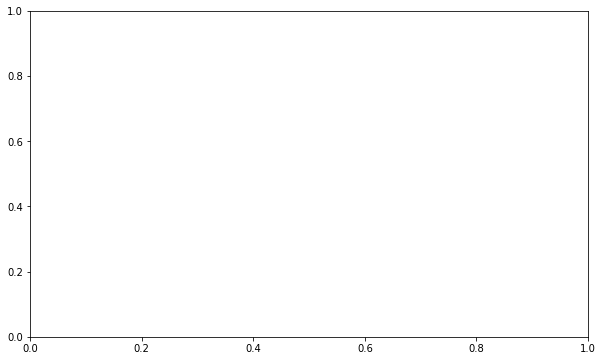

In [53]:
# help(plt.gca())
plt.gca()

plt.plot()으로 그래프를 그리면, matplotlib는 가장 최근의 Figure 객체와 그 subplot에 그림을 그린다.
- 최근의 subplot 객체는 gca() 함수로 자동으로 전달된다.
 - 굳이 [ax를 인수로 전달하는 경우 현재의 ax가 무엇인지 잘 고려해야 한다.](https://stackoverflow.com/questions/47726982/typeerror-inner-got-multiple-values-for-keyword-argument-ax)
- 만약 subplot이 없다면, subplot을 하나 생성한다.
- 이런 경우, Figure 객체와 subplot을 생성하는 과정이 생략될 수 있다.
- k-- 옵션은 검은 점선을 그리기 위한 style 옵션이다.

In [54]:
from numpy.random import randn
# plt.plot(randn(50).cumsum(), 'k--')
ax3.plot(randn(50).cumsum(), 'k--')

아래는 fig.add_subplot 인스턴스를 활용하여 특정 subplot에 직접 그래프를 그리는 예이다.
- alpha는 [0.0, 1.0] 사이의 float 값을 가지며, 불투명도를 나타낸다.

In [55]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

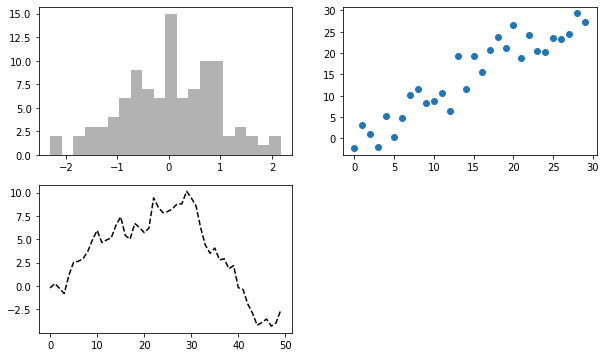

In [56]:
# plt.show()
fig

In [57]:
plt.close('all')

#### 1) 더 편리한 plt.subplots()
특정한 배치에 맞추어 여러 subplot을 갖는 Figure 객체를 생성하기 위한 plt.subplots()라는 편리한 메소드가 있다. 이 메소드는 **figure** 객체와 이 객체가 소유하는 **subplot 객체들을 성분으로하는 NumPy 배열**을 반환한다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1ffffaad0>,
      dtype=object)

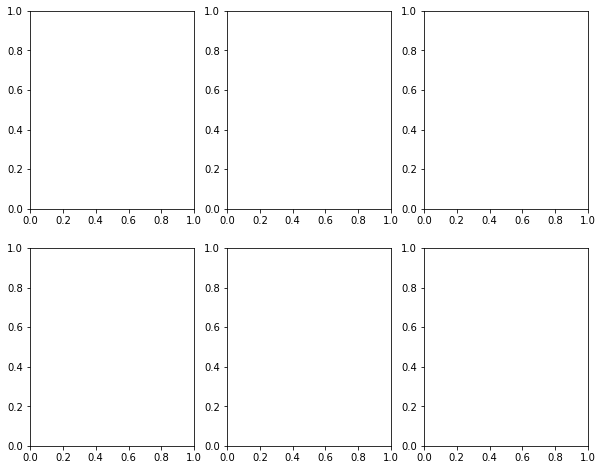

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
axes

axes 배열은 axes[0, 1] 처럼, 2d 배열로 쉽게 색인될 수 있다. 

subplot과 같이 X 혹은 Y 축을 가져야 한다면 각각 sharex, sharey를 사용해야 지정해줄 수 있으며, 같은 범위 내에서 데이터를 비교할 경우, 유용하다. sharex, sharey를 지정하지 않는 경우, matplotlib는 각 그래프의 범위를 독립적으로 조정한다.

plt.subplots의 다양한 옵션:
```python
plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
```
- nrows: subplots의 row 수
- ncols: subplots의 column 수
- sharex: 모든 subplots이 같은 x축 눈금을 사용하도록 한다.(xlim 값을 조절하면 모든 subplots에 적용된다.)
- sharey: 역시 같은 y축 눈금을 사용하도록 한다.(ylim도 같은 의미)
- squeeze: 보통 True로 설정되며, 1D 혹은 2D의 numpy array로 subplot에 접근하도록 최적화해준다.
- subplot_kw: add_subplot()을 사용해 각 subplot을 생성할 때, 사용할 키워드를 담는 사전
- \*\*fig_kw: Figure를 생성할 때 사용할 추가적인 키워드 인자
    - 예) plt.subplots(2,2, figsize=(8,6)) 등

#### 2) Adjusting the spacing around subplots
matplotlib는 subplot간 간격과 여백을 자동으로 설정해준다. 만약 직접 조정하고자 한다면, subplots_adjust 메소드를 이용해 변경할 수 있다. subplot_adjust는 최상위 함수로도 존재한다.
```python
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```
- wsapce와 hspace는 subplots간 간격 조절을 위해 각각 평균 subplot의 너비와 높이에 대한 비율로 값이 지정된다.

다음은 subplot간 간격이 없는 그래프를 생성하는 코드이다.
- 축의 scale 라벨이 겹치는 문제가 발생한다.

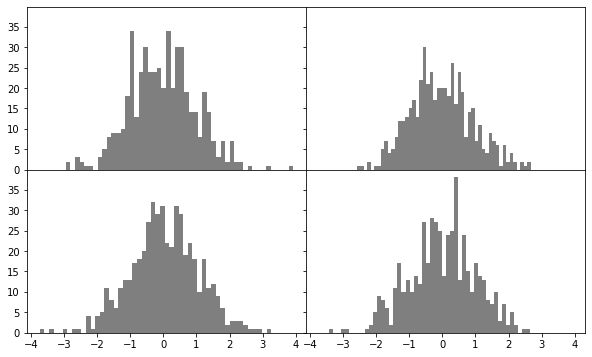

In [59]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

아래와 같이 설정하여 subplot 간의 간격을 subplot의 비율 단위로 조정할 수 있다.

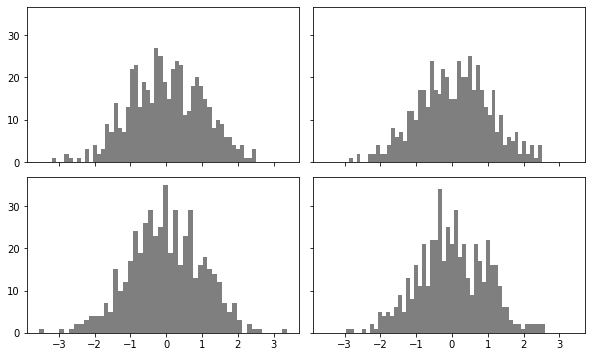

In [60]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.05, hspace=0.1)

### 8.1.2 Colors, markers, and line styles
matplotlib에서 가장 중요한 plot 함수는 x, y data와 색상, 선 스타일 등을 인자로 받는다:
- 녹색 점선은 `ax.plot(x, y, 'g--')`와 같이 나타낼 수 있다.
- 이에 대한 좀더 명시적 방법은: `ax.plot(x, y, linestyle='--', color='g')`이다.
- 흔히 사용되는 color를 위한 색상 문자열이 있지만, RBF(예: #CECECE) 값을 직접 지정할 수 있다.
- 선 스타일과 color에 대한 전체 목록은 [plot 메소드의 문서](https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.plot)를 참조한다.

선 그래프는 특정 지점의 데이터를 강조하기 위해 **marker**를 추가할 수 있다:
- marker가 어느 지점에 설정되는 지 확실하지 않지만, 보통 변곡점, local maxima/minima 등에 설정된다.
- 명시적인 방법은 다음과 같다: 
```python
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

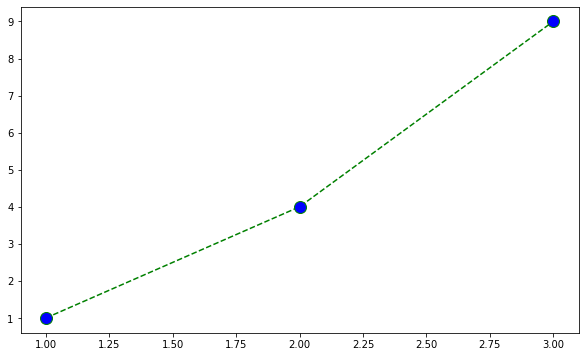

In [61]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [1,4,9]
plt.plot(x,y, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)

plt.show()

marker도 역시 linestyle 문자열에 포함시킬 수 있는데, 다음 예와 같이 색상, 마커, 선스타일 순으로 설정한다.

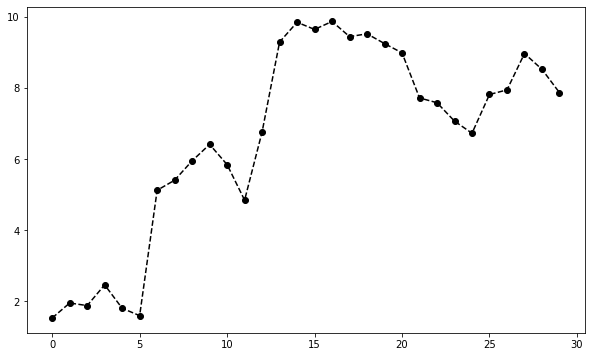

In [62]:
plt.plot(randn(30).cumsum(), 'ko--')

In [63]:
plt.close('all')

선 스타일을 보면, 일정 간격으로 연속된 지점이 연결되는 데, 이는 **drawstyle** 옵션으로 바꿀 수 있다.

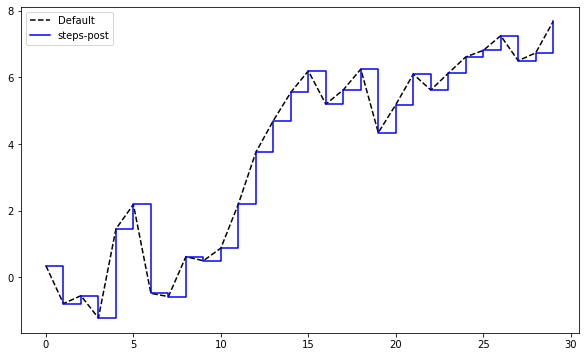

In [64]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 8.1.3 Ticks, labels, and legends(눈금, 라벨, 범례)
그래프를 꾸미는 방법은 2가지 이다:
- pyplot 인터페이스를 이용하여 순차적으로 꾸민다(matlab-like method)
- matplotlib에서 제공하는 API를 이용한 객체지향적인 방법

pyplot 인터페이스는 인터랙티브한 방법으로 설계되어 xlim, xticks, xticklabels와 같은 메소드를 제공한다:
- 인자없이 호출되면, 현재 설정된 매개변수의 값을 반환한다. plt.xlim()메소드는 현재 x축의 범위를 반환한다.
- 인자를 전달하면 매개변수 값이 반환되고, 이 값은 현재 활성화된 또는 가장 최근에 생성된 AxesSubplot 객체에 반영된다.

이와 같은 모든 메소드는 subplot 객체의 get/set 메소드로도 존재한다.
- xlim 메소드에 대해서는 ax.get_xlim(), ax.set_xlim() 메소드가 존재한다.

#### 1) Setting the title, axis labels, ticks, and ticklabels
축을 꾸미는 방법으로 무작위 값으로 간단한 그래프를 생성해보자.

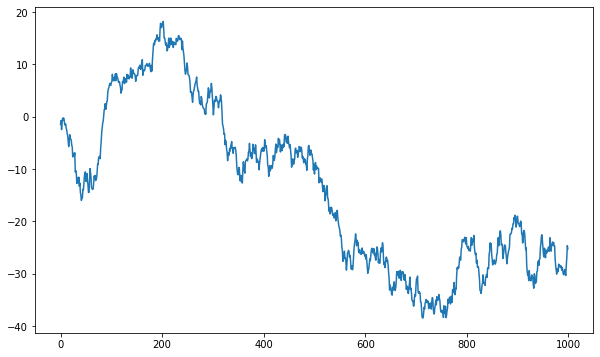

In [65]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

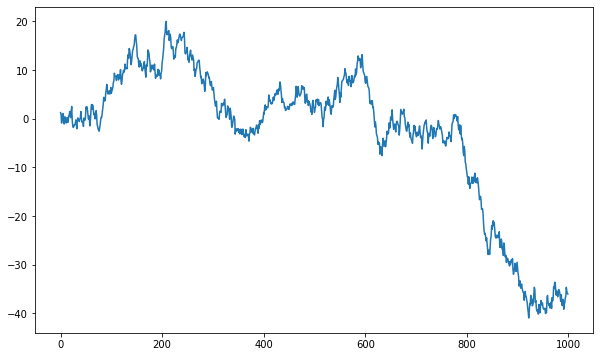

In [66]:
plt.plot(randn(1000).cumsum())

x축의 눈금을 변경하기 위한 쉬운 방법은 set_xticks와 set_xticklabels 메소드를 사용하는 것이다.

Text(0, 0.5, 'Trends')

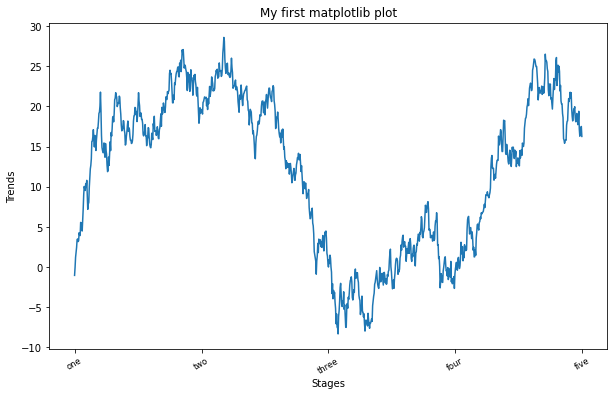

In [67]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Trends')

#### 2) Adding legends(범례 추가하기)
범례를 추가하는 가장 쉬운 방법은 각 그래프에 label 인자를 전달하는 것이다.

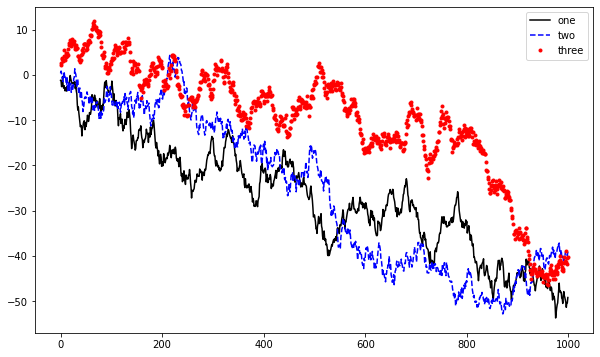

In [68]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'b--', label='two')
ax.plot(randn(1000).cumsum(), 'r.', label='three')

ax.legend(loc='best')

이렇게 하면, ax.legend()나 plt.legend()를 실행할 때, 자동으로 범례가 생성된다.
- 위에서 legend 메소드의 옵션으로 loc='best'를 두었다.
- 범례에서 제외하고 싶은 요소가 있다면, legend 인자를 생략하거나, label='\_nolegend\_'를 사용한다.

[Quiz] iris 데이터를 불러와서 
1. (12, 12) 사이즈의 캔버스를 만들고
2. (4, 4) 사이즈의 axes를 생성한 후,
3. 각 x, y축을 공유한 후,
4. 대각 위치의 도화지에는 각 변수들의 histogram을 그리고
5. 다른 위치의 도화지에는 두 변수 간의 산점도를 그리자.

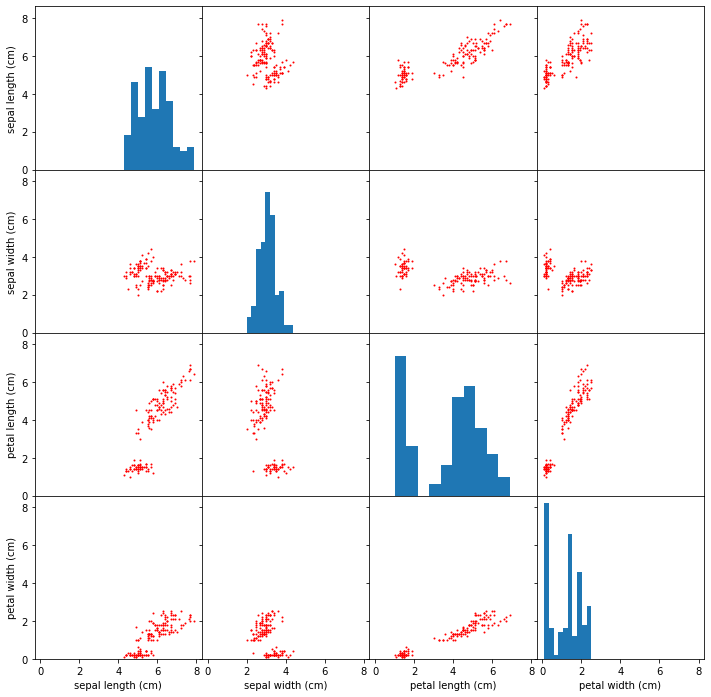

In [71]:
from sklearn.datasets import load_iris
data = load_iris()
X, fn = data.data, data.feature_names
fig, axes = plt.subplots(4,4, sharex=True,sharey=True, figsize=(12,12))
ws = np.ones(X.shape[0])*0.2
n, p = axes.shape
for i in range(n):
    for j in range(p):
        ax = axes[i, j]
        if i == j :
            ax.hist(X[:, i], weights=ws)
        else:
            ax.plot(X[:, j], X[:, i], 'ro', markersize=1)
        if j == 0:
            ax.set_ylabel(fn[i])
        if i == 3:
            ax.set_xlabel(fn[j])

plt.subplots_adjust(wspace=0, hspace=0)

### 8.1.4 Annotations and drawing on a subplot(주석과 그림 추가)
도표에 글자나 화살표, 도형 등으로 주석을 추가하고자 할 경우:
- 글자는 text 옵션
- 화살표는 arrow 옵션

등을 활용한 annotate 메소드를 이용하면 된다.

---
#### 1) 그래프에 주석 추가하기
Axes.annotate(\*args, \*\*kwargs):
- s : str. 주석 text
- xy : iterable. 주석을 추가할 (x,y) 위치를 지정하는 길이 2의 sequence.
- xytext : iterable, optional. 주석이 위치할 (x,y)를 지정하는 길이 2의 sequence. None인 경우, default xy.
- xycoords : str, Artist, Transform, callable or tuple, optional. xy 좌표시스템.
- textcoords : str, Artist, Transform, callable or tuple, optional. xytext 좌표시스템
- arrowprops : dict, optional. xy와 xytext 사이에 [FancyArrowPatch](https://matplotlib.org/api/_as_gen/matplotlib.patches.FancyArrowPatch.html) 화살표를 그리는 데 사용되는 속성을 정의
- annotation_clip : bool, optional. annotation이 axes 영역을 벗어날때 이를 표시할 지 여부를 지정
    - True: 'xy'가 axes 내부에 있을 때만 annotation이 그려짐
    - False: 위치와 관계없이 annotation이 항상 그려짐
    - None(default): **xycoords**가 str으로서 **"data"** 값인 경우만 True로서 동작함.

xycoords이 str인 경우 허용값:
```
    =================   ===============================================
    Property            Description
    =================   ===============================================
    'figure points'     points from the lower left of the figure
    'figure pixels'     pixels from the lower left of the figure
    'figure fraction'   fraction of figure from lower left
    'axes points'       points from lower left corner of axes
    'axes pixels'       pixels from lower left corner of axes
    'axes fraction'     fraction of axes from lower left
    'data'              use the coordinate system of the object being
                        annotated (default)
    'polar'             *(theta,r)* if not native 'data' coordinates
    =================   ===============================================
```

textcoords이 str인 경우 허용값: xycoords의 허용값이 모두 가능하고 추가 값은 다음과 같다.
```
    =================   =========================================
    Property            Description
    =================   =========================================
    'offset points'     offset (in points) from the *xy* value
    'offset pixels'     offset (in pixels) from the *xy* value
    =================   =========================================
```

arrowprops가 `arrowstyle` key를 사용하지 않는 경우 가능한 keys 값:
```
    ==========   ======================================================
    Key          Description
    ==========   ======================================================
    width        the width of the arrow in points
    headwidth    the width of the base of the arrow head in points
    headlength   the length of the arrow head in points
    shrink       fraction of total length to 'shrink' from both ends
    ?            any key to :class:`matplotlib.patches.FancyArrowPatch`
    ==========   ======================================================
```

arrowprops가 `arrowstyle` key를 사용하는 경우, 위의 keys는 사용할 수 없으며, 이때 허용된 값은:
```
    ============   =============================================
    Name           Attrs
    ============   =============================================
    ``'-'``        None
    ``'->'``       head_length=0.4,head_width=0.2
    ``'-['``       widthB=1.0,lengthB=0.2,angleB=None
    ``'|-|'``      widthA=1.0,widthB=1.0
    ``'-|>'``      head_length=0.4,head_width=0.2
    ``'<-'``       head_length=0.4,head_width=0.2
    ``'<->'``      head_length=0.4,head_width=0.2
    ``'<|-'``      head_length=0.4,head_width=0.2
    ``'<|-|>'``    head_length=0.4,head_width=0.2
    ``'fancy'``    head_length=0.4,head_width=0.4,tail_width=0.4
    ``'simple'``   head_length=0.5,head_width=0.5,tail_width=0.2
    ``'wedge'``    tail_width=0.3,shrink_factor=0.5
    ============   =============================================
```

---
pandas.object.asof(where, subset=None): subset 중에, NaN이 전혀없는 last row를 리턴.
- where: date or array of dates.
- subset : string or list of strings, default None. columns의 subset을 지정

예제로 야후 finance에서 얻은 2007년 S&P500 지수 데이터로 그래프를 생성하고, 2008~2009에 있었던 재정위기를 주석으로 추가해본다.
- Series.plot(ax=, style=)로 도표를 그릴 수 있고,
- plt.plot(Series, 'style')로 도표화가 가능하며,
- ax.plot(Series, 'style')도 가능하다.

In [ ]:
# matplotlib.axes.Axes.annotate?
matplotlib.patches.FancyArrowPatch?

Object `matplotlib.patches.FancyArrowPatch` not found.


In [ ]:
help(Series.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

google drive에 접근할 수 있는 권한을 부여해준다.

Text(0.5, 1.0, 'Important dates in 2008-2009 financial crisis')

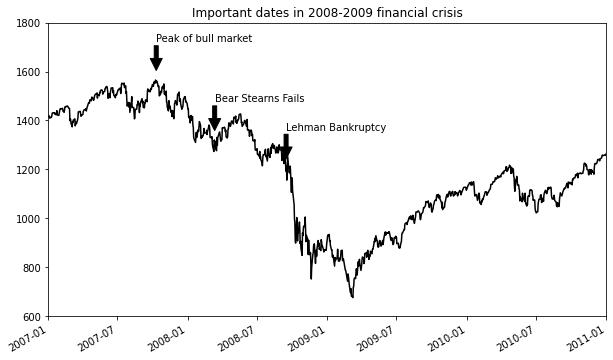

In [72]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('./spx.csv', index_col=0, parse_dates=True) #df
spx = data['SPX'] #Series

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

In [ ]:
print (type(data), data.index.dtype, type(spx))

<class 'pandas.core.frame.DataFrame'> datetime64[ns] <class 'pandas.core.series.Series'>


In [ ]:
spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

#### 2) 그래프에 도형 추가하기
plot에 도형을 추가하기 위해, patches 객체를 만들어 subplots에 Axes.add_patch(patche)를 호출한다.

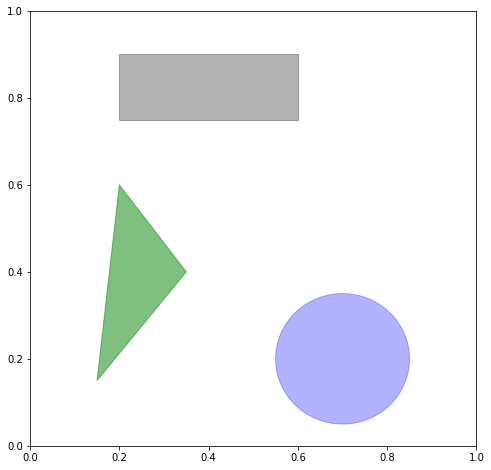

In [73]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

# (x, y), width, height
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [ ]:
type(rect)

matplotlib.patches.Rectangle

class matplotlib.patches.Arc(xy, width, height, angle=0.0, theta1=0.0, theta2=360.0, \*\*kwargs):

class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, \*\*kwargs):
- lower left (x, y)에서 width, height를 갖는 사각형 그리기
- angle: 반시계 방향으로 angle degree 만큼 회전

기본적으로 matplotlib.patches.Patch를 base class로 하여 상속하여 생성되었다.

온라인에서 [matplotlib 갤러리](http://matplotlib.org/gallery.html)를 둘러보면 배울만한 여러가지 주석 예제가 있다.

### 8.1.5 Saving plots to file

- 활성화된 Figure는 plt.savefig 함수를 이용해서 파일로 저장
- Figure 객체의 인스턴스 메서드인 savefig와 동일
- Figure를 SVG 포맷으로 저장하려면 다음처럼 하면 된다.

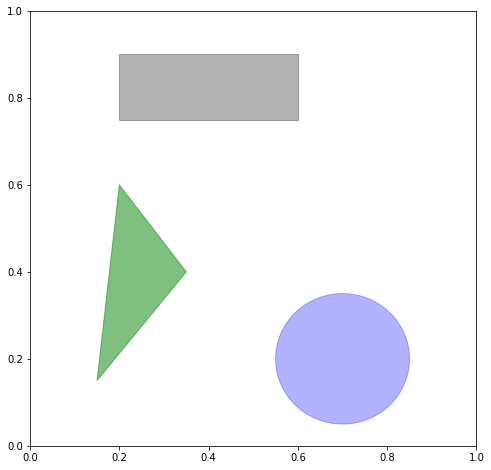

In [ ]:
fig

In [ ]:
fig.savefig('figpath.svg')

파일의 종류는 확장자를 통해 결정하는데, .svg 대신 .pdf를 입력했다면 PDF 파일을 얻을 수 있다.

출판용 그래픽 파일을 생성할 때 자주 사용하는 몇 가지 중요한 옵션은 dpi와 bbox_inches다:
- dpi: 인치당 도트 해상도를 조절
- bbox_inches: 실제 Figure 둘레의 공백을 잘라낸다.

그래프 간 최소 공백을 가지는 400 DPI 짜리 PNG 파일을 만들려면 다음처럼 입력한다.

In [ ]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

#### Figure.savefig 옵션
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" align="left">
  <tr>
    <th class="tg-031e">인자</th>
    <th class="tg-031e">설명</th>
  </tr>
  <tr>
    <td class="tg-031e">fname</td>
    <td class="tg-031e">파일 경로나 파이썬의 파일과 유사한 객체를 나타내는 문자열. <br>저장되는 포맷은 파일 확장자를 통해 결정된다.<br> 예) .pdf는 PDF포맷. .png는 PNG포맷</td>
  </tr>
  <tr>
    <td class="tg-031e">dpi</td>
    <td class="tg-031e">Figure의 해상도 dpi. 기본값은 100이며 설정이 가능</td>
  </tr>
  <tr>
    <td class="tg-yw4l">facecolor, edge color</td>
    <td class="tg-yw4l">서브플롯 바깥 배경 색상. 기본값은 w(흰색)</td>
  </tr>
  <tr>
    <td class="tg-yw4l">format</td>
    <td class="tg-yw4l">명시적인 파일 포맷('png', 'pdf', 'svg', 'ps', 'eps', ...)</td>
  </tr>
  <tr>
    <td class="tg-yw4l">bbox_inches</td>
    <td class="tg-yw4l">Figure에서 저장할 부분. 만약에 'tight'라고 지정하면, <br>Figure 둘레의 비어있는 공간을 모두 제거하게 된다.</td>
  </tr>
</table>

savefig 메서드로 파일에 저장할 수 있을 뿐 아니라 StringIO 같은 파일과 유사한 객체에도 저장 가능한다.
- 이 기능은 웹을 통해 동적으로 생성된 이미지를 보여주고자 할 때 유용하다.
- 아래는 BytesIO를 통해 저장하는 예시이며, BytesIO를 StringIO로 대체하면 완벽히 동일하다.

파이썬 이미지 라이브러리인 PIL을 이용하여 그림 개체로 변환한 예이다.

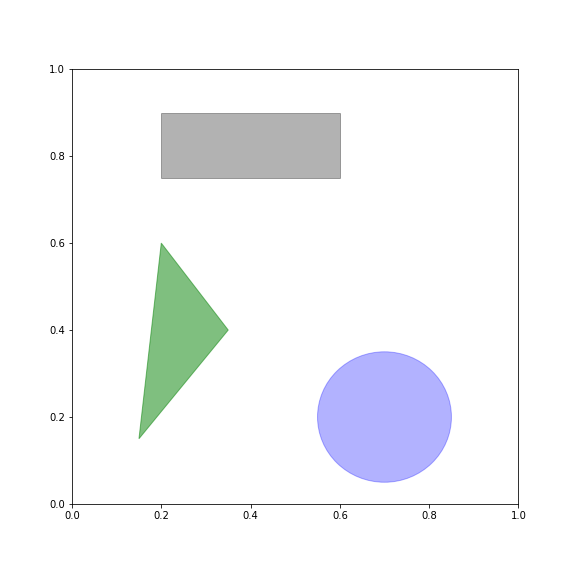

In [ ]:
from io import BytesIO
from PIL import Image
buffer = BytesIO()
fig.savefig(buffer, format='png')
buffer.seek(0) # rewind the data
# plot_data = buffer.getvalue()
im = Image.open(buffer)
im

In [ ]:
type(im)

PIL.PngImagePlugin.PngImageFile

### 8.1.6 matplotlib configuration
matplotlib은 출판물용 도표를 만드는데 손색이 없는 기본 설정과 색상 스키마를 함께 제공한다:
- 거의 모든 기본 동작은 전역 인자를 통해 설정 가능하다.
- 예로서: 도표 크기, 서브플롯 간격, 색상, 글자 크기, 격자 스타일 같은 것들이 있다.

---
matplotlib에서 전역 인자를 통한 환경 설정방법은 2가지가 있다:
- 첫 번째는 [rc 메서드](http://matplotlib.org/api/pyplot_api.html?highlight=pyplot%20rc#matplotlib.pyplot.rc)를 사용해서 프로그래밍적으로 설정하는 방법이다.
    - 예를 들어 Figure의 크기를 `10*10`으로 전역 설정해두고 싶다면 다음 코드 실행
    ```python
    plt.rc('figure', figsize=(10, 10))
    ```
    - rc 메서드의 첫번째 인자는 설정하고자 하는 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend' 및 다른 컴포넌트의 이름을 입력한다.
    - 그 다음에는 컴포넌트의 설정할 속성과 그 값을 키워드 인자로 전달한다.
    - 이 옵션을 쉽게 작성하는 방법으로는 파이썬의 사전 타입을 사용하는 방법이다.
    ```python
    font_options = {'family': 'monospace', 'weight' : 'bold', 'size': 'small'} 
    plt.rc('font', **font_options)
    ```
- 또 다른 방법은, matplotlib/mpl-data 디렉토리 안에 matplotlibrc 파일로 저장하는 것이다.
    - 이 파일을 적절히 수정해서 사용자 홈 디렉토리에 .matplotlibrc라는 이름으로 저장해두면 matplotlib을 사용할 때마다 불러오기를 통해 쉽게 설정을 바꿀 수 있다.
    - 현 작업 시스템에는 `C:\Users\great\Anaconda2\Lib\site-packages\matplotlib\mpl-data`폴더에 존재한다.
    
아래는 matplotlib 패키지의 library 경로를 찾기 위해 lib 참조 경로를 검색하였다.

In [ ]:
# ananconda2를 사용하는 경우
import sys
sys.path

['',
 'C:\\Users\\great\\Anaconda2\\python27.zip',
 'C:\\Users\\great\\Anaconda2\\DLLs',
 'C:\\Users\\great\\Anaconda2\\lib',
 'C:\\Users\\great\\Anaconda2\\lib\\plat-win',
 'C:\\Users\\great\\Anaconda2\\lib\\lib-tk',
 'C:\\Users\\great\\Anaconda2',
 'C:\\Users\\great\\Anaconda2\\lib\\site-packages',
 'C:\\Users\\great\\Anaconda2\\lib\\site-packages\\Sphinx-1.4.6-py2.7.egg',
 'C:\\Users\\great\\Anaconda2\\lib\\site-packages\\win32',
 'C:\\Users\\great\\Anaconda2\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\great\\Anaconda2\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\great\\Anaconda2\\lib\\site-packages\\setuptools-27.2.0-py2.7.egg',
 'C:\\Users\\great\\Anaconda2\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\great\\.ipython']

In [ ]:
# anaconda3를 사용하는 경우
import sys
sys.path

['',
 'C:\\Users\\great\\Anaconda3\\python35.zip',
 'C:\\Users\\great\\Anaconda3\\DLLs',
 'C:\\Users\\great\\Anaconda3\\lib',
 'C:\\Users\\great\\Anaconda3',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages\\Sphinx-1.4.6-py3.5.egg',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages\\xgboost-0.6-py3.5.egg',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.5.egg',
 'C:\\Users\\great\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\great\\.ipython']

## 8.2 Plotting functions in pandas
데이터를 보여줄 다양한 형태(선 그래프, 막대 그래프, 봉 차트, 분포도, 등고선 등)의 도표와 범례, 제목, 눈금 이름 같은 주석을 조합해서 그래프를 만들어야 한다. 대부분의 데이터는 여러가지 객체로 표현되기 때문에 하나의 온전한 그래프를 그리기 위해서는 기본 컴포넌트들을 조합해야 한다.

pandas에는 row 명, column 명, 필요시 group 정보도 담고 있어서 pandas를 이용하면 다양한 종류의 완전한 그래프를 그리기 위해, 한 두줄의 간단한 matplotlib 문장 만으로 구현할 수 있다는 것이다.
- pandas를 통해 일반적인 시각화를 위한 도표를 작성할 수 있는 메서드가 늘어나고 있다.
- 현재도 pandas의 그래프 기능과 관련한 많은 작업이 진행중이다.

이와 관련된 정보는 [pandas 온라인 문서](https://pandas.pydata.org/pandas-docs/stable/visualization.html)를 참고하자.
- 참고로 pandas 온라인 문서는 [rst 파일 포맷](https://github.com/pandas-dev/pandas/blob/master/doc/source/visualization.rst)으로 되어 있으며,
- rst 포맷을 ipynb 포맷으로 변경하는 [프로젝트](https://github.com/stsievert/rst-to-ipynb)는 개발중이다.
- rst 포맷에 대해 더 알고 싶은 분은 [파이썬 소스코드 문서화하기](http://www.hanul93.com/python-sphinx/)를 참고한다.

---
참고로 아래와 같이 ggplot like한 그림을 그릴 수 있다.

In [79]:
import matplotlib
matplotlib.style.use('ggplot')

In [ ]:
matplotlib.style.use?

matplotlib.style.use(style):
- 이 함수는 style 규격으로 matplotlib style을 설정하는 함수이다.
- 원래의 style로 돌아가기 위해서는 단지 `matplotlib.style.use('default')`을 실행하면 된다.

```
Parameters
----------
style : str, dict, or list
    A style specification. Valid options are:

    +------+-------------------------------------------------------------+
    | str  | The name of a style or a path/URL to a style file. For a    |
    |      | list of available style names, see `style.available`.       |
    +------+-------------------------------------------------------------+
    | dict | Dictionary with valid key/value pairs for                   |
    |      | `matplotlib.rcParams`.                                      |
    +------+-------------------------------------------------------------+
    | list | A list of style specifiers (str or dict) applied from first |
    |      | to last in the list.                                        |
    +------+-------------------------------------------------------------+
```

자세한 내용은 [관련 문서](http://matplotlib.org/api/style_api.html?highlight=matplotlib%20style#module-matplotlib.style)를 참고한다.

### 8.2.1 Line plots
Series와 DataFrame은 둘 다 plot이라는 메서드를 통해 다양한 형태의 그래프를 생성하며, 기본적으로 plot 메서드는 선 그래프를 생성한다.

In [ ]:
plt.close('all')

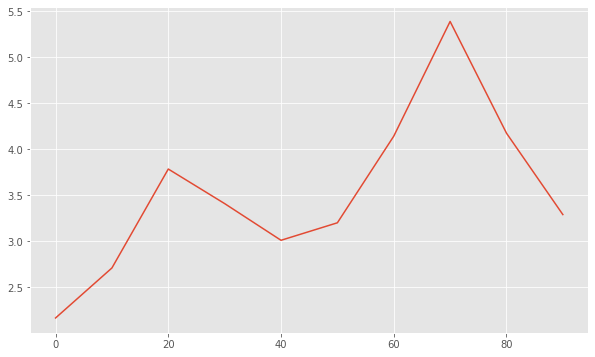

In [ ]:
# cumsum 메소드로 인해 값이 누적된다.
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Series 객체의 색인은 matplotlib에서 그래프를 생성할 때 X축으로 해석되며, use_index = False 옵션을 넘겨서 색인을 그래프의 축으로 사용하는 것을 막을 수 있다.
- 축의 눈금과 한계는 xticks 옵션과 xlim 옵션으로 조절 가능
- Y축 역시 yticks, ylim 옵션으로 조절 가능

대부분의 pandas 그래프 메소드는 ax 인자를 받는데, 이 인자는 matplotlib의 subplot 객체가 될 수 있다.
- 이를 통해 그리드 배열 상에서 서브플롯의 위치를 좀 더 유연하게 가져갈 수 있음

DataFrame의 plot 메소드는 하나의 subplot 안에 각 칼럼 별로 선 그래프를 그리고, 자동적으로 범례를 생성한다.

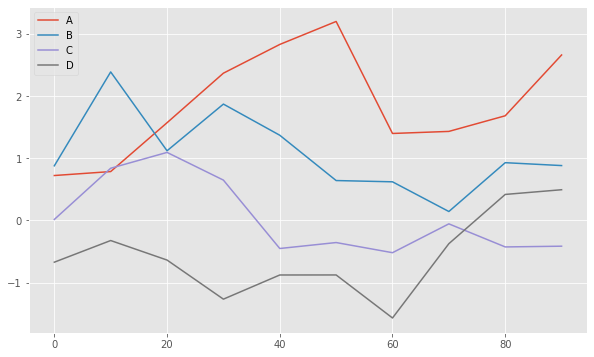

In [ ]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

plot에 전달된 파라미터 인자는 각각 같은 이름으로 대응되는 matplotlib의 함수로 전달된다.
- 따라서 matplotlib API를 잘 알고 있으면, 그래프 설정을 더 쉽게 할 수 있다.

**Series.plot 메소드 인자**:

<table align="left">
  <tr>
    <th>인자</th>
    <th>설명</th>
  </tr>
  <tr>
    <td>label</td>
    <td>그래프의 범례 이름</td>
  </tr>
  <tr>
    <td>ax</td>
    <td>그래프를 그릴 matplotlib의 서브플롯 객체. <br>만약에 아무것도 넘어오지 않으면 현재 활성화되어 있는 matplotlib의 서브플롯을 사용한다.</td>
  </tr>
  <tr>
    <td>style</td>
    <td>matplotlib에 전달할 'ko--' 같은 스타일의 문자열</td>
  </tr>
  <tr>
    <td>alpha</td>
    <td>그래프 투명도(0부터 1까지)</td>
  </tr>
  <tr>
    <td>kind</td>
    <td>그래프 종류. 'line', 'bar', 'barh', 'kde', 'hist', 'box', 'pie'</td>
  </tr>
  <tr>
    <td>logy</td>
    <td>Y축에 대한 로그 스케일링</td>
  </tr>
  <tr>
    <td>use_index</td>
    <td>객체의 색인을 눈금 이름으로 사용할지의 여부</td>
  </tr>
  <tr>
    <td>rot</td>
    <td>눈금 이름을 로테이션(0부터 360까지)</td>
  </tr>
  <tr>
    <td>xticks</td>
    <td>X축으로 사용할 값</td>
  </tr>
  <tr>
    <td>yticks</td>
    <td>Y축으로 사용할 값</td>
  </tr>
  <tr>
    <td>xlim</td>
    <td>X축 한계</td>
  </tr>
  <tr>
    <td>ylim</td>
    <td>Y축 한계</td>
  </tr>
  <tr>
    <td>grid</td>
    <td>축의 그리드를 표시할지의 여부(기본값은 켜기)</td>
  </tr>
</table>

DataFrame에는 칼럼을 쉽게 다루기 위해 몇 가지 추가적인 옵션을 제공한다:
- 모든 칼럼을 같은 서브플롯에 그릴 지 여부 등

**DataFrame에서만 사용하는 plot 옵션**
<table align="left">
  <tr>
    <th>인자</th>
    <th>설명</th>
  </tr>
  <tr>
    <td>subplots</td>
    <td>각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.</td>
  </tr>
  <tr>
    <td>sharex</td>
    <td>sharex=True면 같은 X축을 공유하고 눈금과 한계를 연결한다.</td>
  </tr>
  <tr>
    <td>sharey</td>
    <td>sharey=True면 같은 Y축을 공유한다.</td>
  </tr>
  <tr>
    <td>figsize</td>
    <td>생성될 그래프의 크기를 튜플로 지정한다.</td>
  </tr>
  <tr>
    <td>title</td>
    <td>그래프의 제목을 문자열로 지정한다.</td>
  </tr>
  <tr>
    <td>legend</td>
    <td>서브플롯의 범례를 추가한다. 기본값은 True</td>
  </tr>
  <tr>
    <td>sort_columns</td>
    <td>칼럼을 알파벳 순서로 그린다. 기본값은 존재하는 칼럼 순서다.</td>
  </tr>
</table>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1fdf6b310>,
      dtype=object)

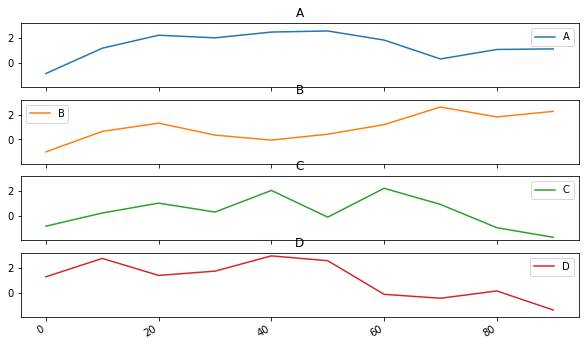

In [75]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot(subplots=True, sharey=True, title=['A', 'B', 'C', 'D'])

In [ ]:
pd.DataFrame.plot?

```
>>> df.plot.line()
>>> df.plot.scatter('x', 'y')
>>> df.plot.hexbin()
```

These plotting methods can also be accessed by calling the accessor as a
method with the ``kind`` argument:
```
df.plot(kind='line')
``` 
is equivalent to 
```
df.plot.line()
```

---
시계열 그래프는 10장에서 다룬다.

### 8.2.2 Bar plots
선 그래프 대신 막대 그래프를 그리려면 kind='bar'(수직 막대) 또는 kind='barh'(수평 막대) 옵션을 지정하면 된다.
- 이 때 Series나 DataFrame의 색인은 X(bar) 눈금이나 Y(barh) 눈금으로 사용된다.

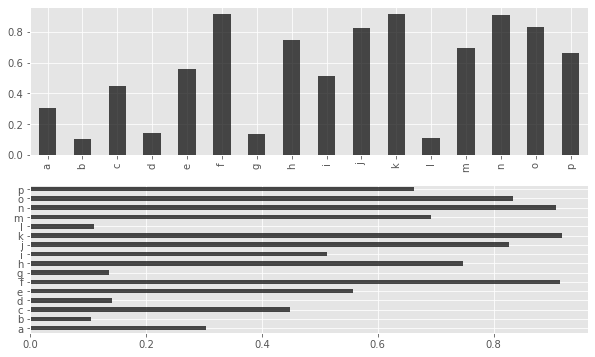

In [ ]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

#### 1) DataFrame에 대한 bar plot

막대그래프는 기본적으로 범주형 변수에 대한 빈도값을 다루므로:
- df에서 막대 그래프는 각 로우의 값을 집계한 그룹 별 빈도 막대를 제공한다.
- df.plot은 column name으로부터 자동으로 범례를 생성한다.
- bar 챠트 작성시 기본적으로 **각 row를 범주로 한 graph를 생성**한다.
- 만약 column을 범주로한 graph를 생성하고자 하는 경우라면 df.T.plot을 사용한다.

In [ ]:
DataFrame.plot?

In [76]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.111887,0.864568,0.360606,0.148802
two,0.107325,0.861678,0.777178,0.927855
three,0.343778,0.151447,0.324061,0.270725
four,0.377544,0.121652,0.580699,0.001385
five,0.367859,0.339610,0.100464,0.270267
six,0.549286,0.358348,0.623655,0.086091


df column index의 label인 Genus가 범례의 제목으로 사용되었다.

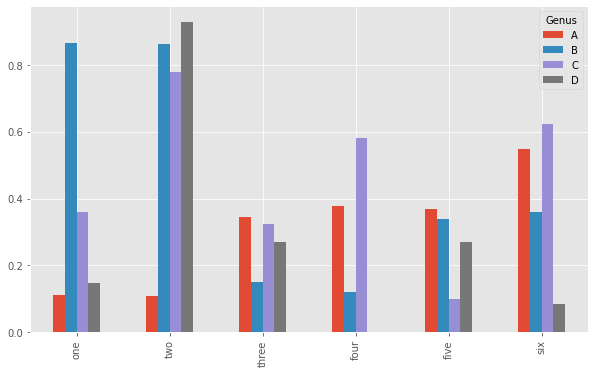

In [80]:
df.plot(kind='bar')

누적 막대는 stacked=True 옵션을 사용해서 생성할 수 있다. 각 row의 값이 색별로 누적된 막대가 나타난다.

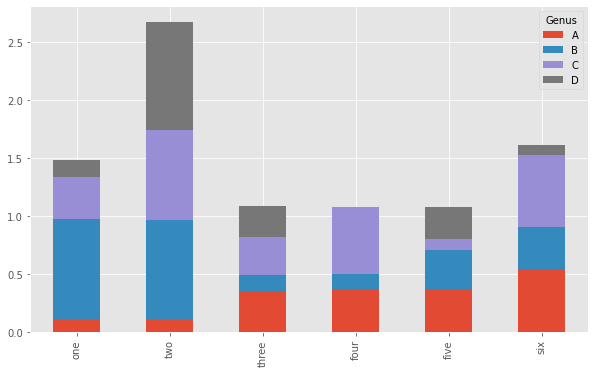

In [81]:
df.plot(kind='bar', stacked=True)

막대 그래프의 대상 범주를 row가 아닌 column name으로 하려는 경우 T연산을 수행하고 plot한다.

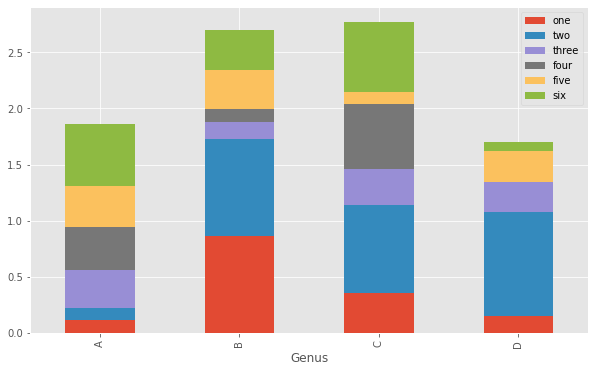

In [82]:
df.T.plot(kind='bar', stacked=True)

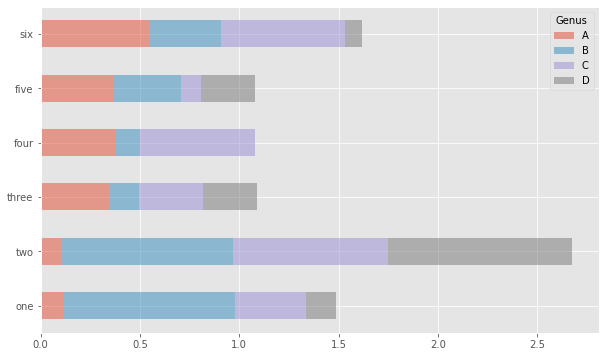

In [83]:
df.plot(kind='barh', stacked=True, alpha=0.5)

막대 그래프는 Series에서 값의 빈도인 value_counts를 그래프로 그리는 것이다: 
- s.value_counts().plot(kind='bar')

---
#### 2) 예제: tip data
이 책의 앞부분에서 살펴본 팁 데이터를 리뷰하자.
- 여기서 요일별 파티 빈도와 파티 빈도별 팁 비율을 그려보자.
- read_csv를 사용해 데이터를 불러오고 요일과 파티 수에 대한 교차 테이블을 생성하자.

In [84]:
tips = pd.read_csv('./tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [85]:
import seaborn as sns

In [86]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


아래는 size가 day와 달리 column name으로 인식되지 않고, df의 member attribute로 인식되어 crosstab이 정상적으로 이뤄지지 않는다.
- $df.size = df.shape[0] \times df.shape[1]$

참고로 df["colname"]과 df.colname은 동일하다.

In [87]:
print (tips.shape)
print (tips.shape[0]*tips.shape[1])

(244, 7)
1708


In [88]:
print (type(tips["size"]))
print (type(tips.size))
tips.size

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


1708

In [89]:
print (type(tips["day"]))
print (type(tips.day))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


tips의 size 컬럼을 범주형으로 변환하고, 교차분할표를 작성하자.

In [90]:
print (tips["size"].astype("category").head())
# print tips.size.astype("category").head() #error

0    2
1    3
2    3
3    2
4    4
Name: size, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]


In [91]:
party_counts = pd.crosstab(tips.day, tips.size)
party_counts

col_0,1708
day,
Thur,62
Fri,19
Sat,87
Sun,76


In [94]:
tips.groupby(['day', 'size']).size().unstack()

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [92]:
party_counts = pd.crosstab(tips.day, tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


이제 여기서 1번과 6번은 많지 않으므로 제외한다면:

In [95]:
# Not many 1- and 6-person parties
party_counts = party_counts.iloc[:, 1:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


위에는 column 명과 column index가 동일하여, 
- index에 의한 access 규칙이 아닌, (이때는 ix를 iloc으로 대체한다.)
- name에 의한 access 규칙이 성립한다. (이때는 ix를 loc으로 대체한다.)

참고로:
- name2:name5: name2부터 name5까지
- (index인 경우) 2:5: column3부터 column5까지

In [ ]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, '2':'5']
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


이제 요일별로 파티 빈도의 비율을 구해보자. 이를 위해서는:
- 각 요일별 파티 빈도의 합을 구하고,
- 그 합으로 각 요일별 빈도를 나눠주면 된다.

각 로우의 합이 1이 되도록 정규화를 해주기 위해서는:
- (n, m) shape이 (n 1) shape으로 바뀌어야 하므로,
- sum 연산의 대상 축은 1로 축소가 되므로, axis=1이 되어야 한다.
- 또한 파이썬 정수 나눗셈 문제를 피하기 위해 실수형으로 형 변환을 해야한다.

df.div(other, axis='columns', level=None, fill_value=None):
>df를 other로 성분별 나눗셈 결과를 float type으로 리턴한다.
- other: Series, df, 또는 상수.
- **axis**: {0, 1, 'index', 'columns'}. df와 other간 두 객체의 매칭 index가 될 축 지정
- fill_value: None or float value, default None. NaN 대체 값. 연산 축의 모든 값이 NaN인 경우는 NaN.
- level: int or name. 다중 index에서 매칭되는 index 값 및 level에 따라 broadcast. 

df.sum(axis=None, skipna=None, level=None, numeric_only=None, \*\*kwargs):
>axis를 따라 reduce 연산을 수행하는 집계함수.
- **axis** : {index (0), columns (1)}. 연산결과 length가 1로 축소가 될 축 지정.
- skipna : boolean, default True. 연산에서 배제 여부. 전체가 NaN이면 NaN.
- level: int or name. 다중 index에서 매칭되는 index 값 및 level에 따라 연산.
- numeric_only : boolean, default None. float, int, boolean data 만을 연산 대상으로 함.
    - None인 경우, 모든 data를 연산하려고 시도하며, numeric data만을 사용한다.
    
df 등 pandas의 산술연산(`+, -, *, /` 예: df1 + df2):
- 각 index와 column name에 맞추어 매칭 연산(+)이 이뤄진다.
- 매칭되지 않는 index에 대한 값은 모두 NaN으로 채워진다.
- df와 Series간 연산에 대해 index에 맞추어 index가 없는 축으로 broadcasting이 이뤄진다.
 - index가 row게 걸쳐 존재한다면, column 방향으로 broadcasting이 발생한다.
- 각 산술연산은 연산기호가 아닌 메소드로 사용할 수 있다.
```python
df1.math_method(df2, fill_value=None)
```

산술연산 메소드의 종류:
- add : 덧셈(`+`)을 위한 메서드
- sub : 뺄셈(`-`)을 위한 메서드
- div : 나누셈(`/`)을 위한 메서드
- mul : 곱셈(`*`)을 위함 메서드

[문제] broadcasting의 예: 아래 연산의 결과에 답하라.

In [96]:
frame = DataFrame(np.arange(12.).reshape((4, 3)),
                  columns=list('bde'),
                  index=['Utha', 'Ohio', 'Texas', 'Oregon'])
series = Series(range(3), index=list('bef'))

frame - series

,b,d,e,f
Utha,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


In [ ]:
party_counts.sum?

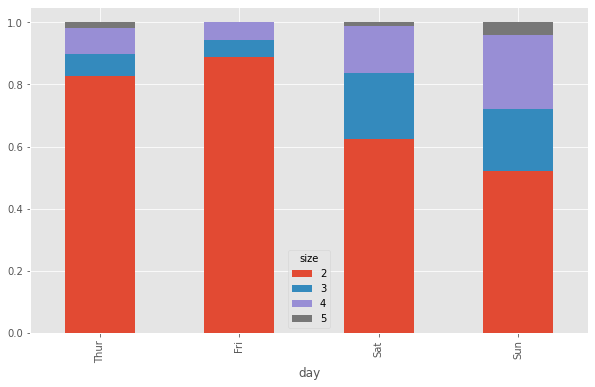

In [97]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

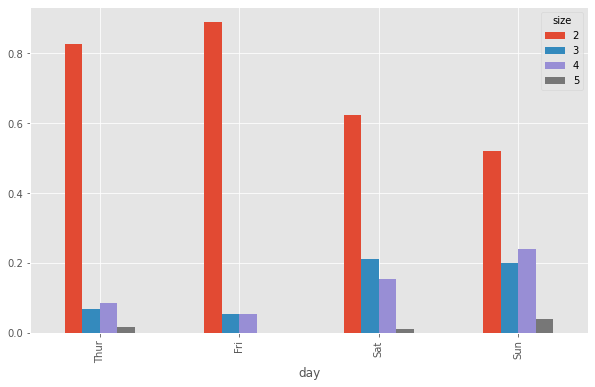

In [98]:
party_pcts.plot(kind='bar')

이겨서 잠깐 np.random 패키지의 랜덤 함수를 리뷰하면:
---
- rand(size): [0, 1) 범위의 값(python float)을 갖는 size 형태의 ndarray를 생성
- randn(size): 표준정규분포에서 추출된 size 형태의 ndarray를 생성
- randint(low, high=None, (size)):
    - high = None 인 경우, [0, low) 범위의 정수 set에서 추출한 size 형태의 ndarray를 생성
    - high = None 아닌 경우, [low, high) 범위의 정수 set에서 추출한 size 형태의 ndarray를 생성
- random_integers(low[, high, (size)]): randint와 유사하나,
    - high = None 인 경우, [1, low] 범위에서
    - high = None 아닌 경우, [low, high] 범위에서 추출한다.
- random_sample((size)): rand와 동일하나, size 표기가 tuple인 점이 다르다.
- random((size)): random_sample과 동일
- ranf((size)): random_sample과 동일
- sample((size)): random_sample과 동일
- choice(1da, size=None, replace=True, p=None): 
    - 1da: 1 D array or int: 주어진 1차원배열에서 또는 1da가 int인 경우, np.arange(1da)에서
    - replacement=True(반복허용) 여부에 따라,
    - 1da와 동일한 length를 갖는 p의 확률 또는 p=None인 경우 동등확률로 sample을 size만큼 추출한다.
- bytes(length): length 길이 만큼의 random string bytes를 생성
---

- shuffle(x): x 자체를 random shuffle한다. 리턴없다.
- permutation(x): x는 int이거나 array-like. x 길이 만큼의 random 순열을 리턴한다. x를 바꾸지 않는다.
    - x가 다차원 array라면, 첫번째 축만 순열한다. 
    - shuffle과 다른 점은 x 자체를 바꾸지 않고, 순열을 리턴한다는 점 뿐이다.
---    
    
- binomial(n, p[, size]): p확률 이항분포에서 n번 시행할 때, positive 빈도를 size 만큼의 샘플로 추출한다.
- chisquare(df, size=None): 자유도 df의 카이스퀘어 분포로 부터 size 만큼의 샘플을 추출한다.
- f(dfnum, dfden[, size]): 분자자유도 dfnum, 분모자유도 dfden의 F분포로 부터 size만큼 샘플 추출.
- multinomial(n, pvals, size=None): 
    - p 개의 범주에 대해, pvals 발생확률을 갖는 다항분포에서 
    - n번 시행시 범주별 발생빈도(vector)를 size 만큼의 샘플로 추출한다.
- multivariate_normal(mean, cov[, size, check_valid, tol]): (size, length(mean)) shape의 다변량 정규분포 샘플.
    - mean : 1-D array_like, of length N. N개 다변량에 대한 정규분포의 평균 벡터
    - cov : 2-D array_like, of shape (N, N). N개 다변량 간의 공분산 matrix
    - size : int or tuple of ints, optional
    - check_valid : { 'warn', 'raise', 'ignore' }, optional. 공분산 매트릭스가 양정칙이 아닌 경우. 처리방법
    - tol : float, optional. 공분산에서 singular 값 검토시 tolerence.
- normal(loc=0.0, scale=1.0, size=None): 1차원 또는 다차원 정규분포 샘플
    - loc : float or array_like of floats. n 차원 공간의 center.
    - scale : float or array_like of floats. n 차원 공간의 표준편차
    - size : int or tuple of ints, optional
- standard_t(df, size=None): 자유도 df의 표준 t 분포 샘플

In [ ]:
np.random.binomial(9, 0.1, 20)

array([1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0])

6개의 다항 분포에서 각각의 범주의 확률이 [1/7, 1/7, 1/7, 1/7, 1/7, 2/7]인 경우 100회 시행시 출련 빈도에 대해 4개의 샘플을 추출한 결과는 아래와 같다.

In [ ]:
np.random.multinomial(100, [1/7.]*5 + [2/7.], size=4)

array([[15, 18,  9, 12, 13, 33],
       [16, 17, 13, 13, 14, 27],
       [13, 11, 21, 15, 17, 23],
       [ 8, 25, 13, 19, 10, 25]])

아래는 2차원 다변량 정규분포에서 평균과 공분산의 조건아래 분포의 샘플을 보여준다.

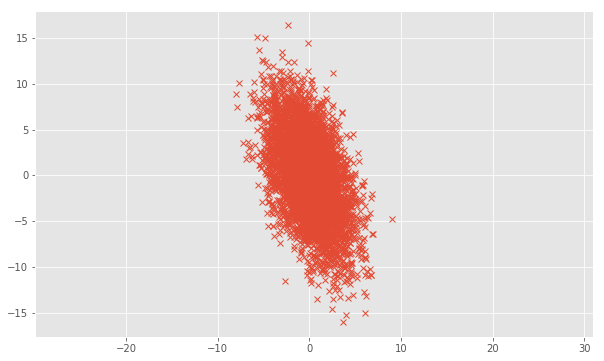

In [ ]:
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[5, -5], [-5, 20]]

x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [ ]:
np.random.multivariate_normal(mean, cov, 10)

array([[-1.6301,  1.2979],
       [ 1.7532, -6.0408],
       [-1.8897,  6.0255],
       [-0.1964,  1.682 ],
       [-1.1469, -3.277 ],
       [ 0.7533, -0.5488],
       [-3.6749,  6.0409],
       [-3.8257,  9.7983],
       [ 3.8006, -7.4718],
       [-0.2728, -9.8244]])

아래와 같이 T로 전치시키면: x, y로 분리시킬 수 있다.

In [ ]:
np.random.multivariate_normal(mean, cov, 10).T

array([[-0.2406, -0.0418,  5.8703,  3.0363,  1.8543, -0.6888,  2.2911,
         3.2329,  1.1304,  1.6121],
       [ 4.4959, -3.0143, -5.7434, -5.644 , -2.278 , -3.0144, -4.4206,
         0.0126, -6.5934, -4.9408]])

### 8.2.3 Histograms and density plots
#### 1) 히스토그램
히스토그램은 연속형 변수를 구간을 나누어 그 빈도를 막대 그래프처럼 보여준다.
- 막대 그래프와의 차이점은 각 막대가 히스토그램은 이어져 있지만, 막대 그래프는 떨어져 있다.
- 보통 구간은 균등하게 설계되며, 구간 내의 데이터 빈도는 높이로 표현된다.

앞에서 살펴본 팁 데이터를 사용해서 전체 결제 금액 대비 팁의 비율을 Series의 hist 메서드를 사용해서 만들어보자

In [99]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

아래와 같이 df에서 하나의 column 만을 선택하면, Series가 되고
- column name은 없어지며,
- index만이 동일하게 유지되므로

다음과 같이 직접적인 산술연산이 가능하게 된다.

In [ ]:
print (type(tips['tip']))
tips['tip'].head()

<class 'pandas.core.series.Series'>


0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

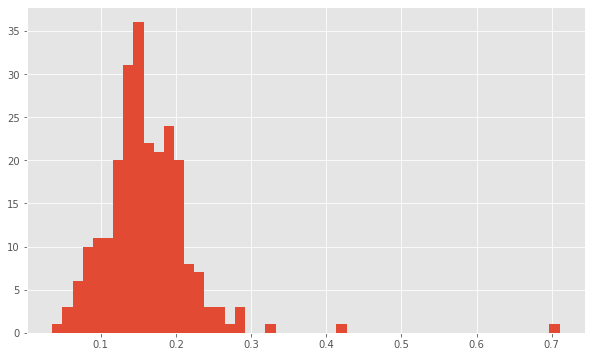

In [100]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [101]:
tips[tips.tip_pct > .6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


그렇다면 팁을 얼마나 줘야 현실적일까?

In [102]:
print (tips.tip_pct.mean())
print (tips.tip_pct[tips.tip_pct<0.3].mean())
print (tips.tip.sum() / tips.total_bill.sum())

0.16080258172250478
0.15677628857682768
0.15153580224410024


- 이상치를 제거한 0.15가 적당한 비율이라고 봐야할 것이다.
- 그러나 아래에서 보듯이 지불액 대비 평균보다 과하게 지불된 팁의 경우는 지불액 자체가 매우 적으므로 이상치를 제거하지 않는 편이 좋겠다.
- 따라서 제일 적당한 값은 0.1515이며, 대충 15%라고 생각하는 게 합리적이다.
- 1번은 비율자체의 평균을 구한 것이므로, 이상치에 의해 왜곡되기 때문에 적당한 방법이 아니다.

In [ ]:
print (tips.tip.mean(), tips.total_bill.mean())
print (tips[tips.tip / tips.total_bill > .3])

2.9982786885245902 19.785942622950824
     total_bill   tip     sex smoker  day    time  size   tip_pct
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667


범주형 변수에 대한 hist는 아래와 같이 bar plot을 그릴 수 있도록 변경되었다.

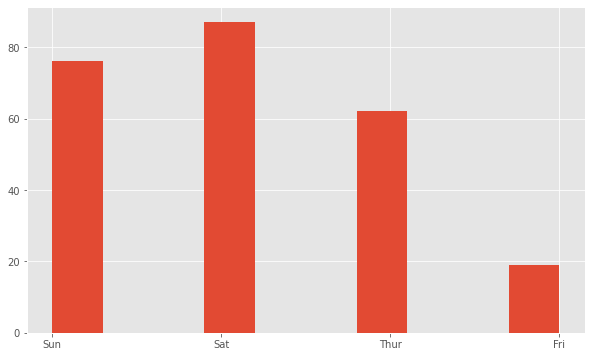

In [ ]:
try:
    tips.day.hist()
except TypeError: 
    print ("연속형 변수가 아닌 것은 hist 메소드를 사용할 수 없다.")
    plt.close('all')

[Quiz] tips.day에 대한 bar plot을 그려보세요.

In [104]:
try:
    tips.day.plot(kind='bar')
except Exception as e:
    print(e)

no numeric data to plot


plot(kind='ba')를 그리려면, 아래와 같은 시리즈 형식을 가져야 그릴 수 있다:
```
Thur    62
Fri     19
Sat     87
Sun     76
```
- hist는 구간별 **빈도를 세어서** 막대 그래프를 그리는 함수
- bar는 빈도표의 값을 그대로 막대 그래프로 그리는 함수 

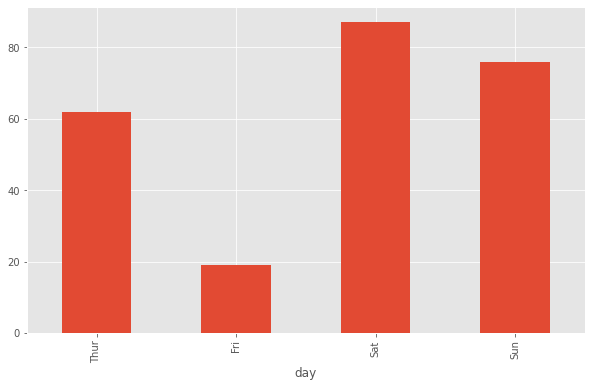

In [105]:
tips.groupby('day').size().plot(kind='bar')

#### 2) 커널 밀도 추정(KDE) 그래프

밀도 그래프는 주어진 데이터를 이용하여 연속된 확률분포 곡선을 추정한다.
- 일반적으로는 kernels 메서드를 잘 섞어서 이 분포를 근사하는 식으로 그리는데, 
- 보통 정규분포의 gaussian kernel을 사용하며, 기계학습에서는 smoother라고도 부르다.

밀도 그래프는 KDE(Kernel Density Estimate), 커널 밀도 추정 그래프라고도 알려져 있다.

>plot 메서드의 인자로 kind='kde'를 넘기면 밀도 그래프를 표준 KDE 형식으로 생성한다.

In [106]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

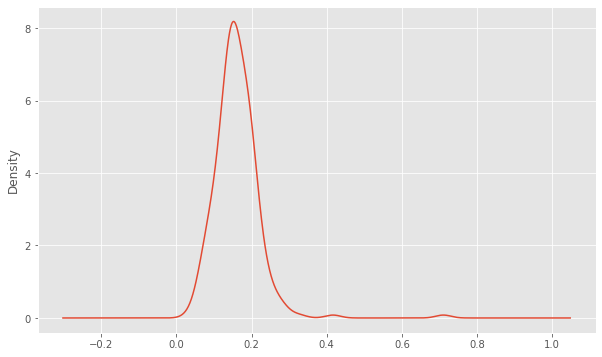

In [107]:
tips['tip_pct'].plot(kind='kde')

{'figure': <Figure size 720x432 with 1 Axes>,
 '_subplotspec': <matplotlib.gridspec.SubplotSpec at 0x1eb30f4db70>,
 'figbox': Bbox([[0.125, 0.125], [0.9, 0.88]]),
 'rowNum': 0,
 'colNum': 0,
 'numRows': 1,
 'numCols': 1,
 '_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x1eb30f4d828>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': <bound method Figure.__remove_ax of <Figure size 720x432 with 1 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_position': Bbox([[0.125, 0.125], [0.9, 0.88]]),
 '_original

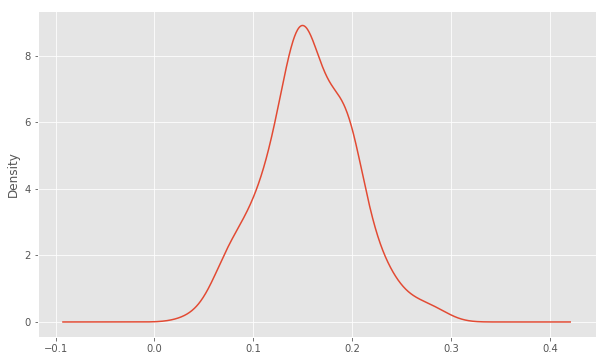

In [ ]:
tips.tip_pct[tips.tip_pct<.3].plot(kind='kde').__dict__

- 참고: [네임스페이스에 대한 이야기](https://wikidocs.net/1743)

밀도분포를 이해하기 위해 2개의 정규분포로 이뤄진 분포곡선을 보자.

Text(0.5, 0, 'random x')

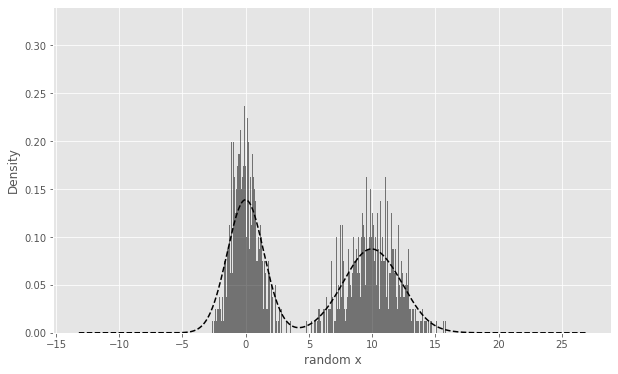

In [ ]:
comp1 = np.random.normal(0, 1, size=2000)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=2000)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=1000, alpha=0.5, color='k', density=True)
values.plot(kind='kde', style='k--')
plt.gcf().axes[0].set_xlabel("random x")

In [ ]:
values.hist()

0       -0.314109
1        1.418566
2       -0.025673
3       -0.714128
4        0.297697
          ...    
3995     8.384304
3996     9.169125
3997    10.527162
3998    11.533105
3999     4.150346
Length: 4000, dtype: float64

- kind='kde'를 사용하면 자동으로 ylabel이 Density로 지정된다.
- xlabel을 지정하기 위해 :
 - plt.gcf()로 figure 객체를 가져오고, 
 - figure 객체의 axes 속성의 첫 subplot의 메소드 set_xlabel 메소드를 통해 xlabel을 지정한다.
- 그러나 간단히 plt.xlabel 메소드를 이용하면 더 쉽다.

values.hist 메소드 인자: 
- bins: 히스토그램의 구간(bin)을 몇 개로 나눌 것인지를 지정.
- alpha: 투명도
- density: 정규화. 전체 합이 1이 되도록 정규화 시킴.

kde의 경우, [plot의 kde](https://pandas-docs.github.io/pandas-docs-travis/generated/pandas.DataFrame.plot.kde.html) 메소드를 이용하여 더 상세한 설정이 가능하다.
- 더 자세한 내용은 [scipy.stats.gaussian_kde](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde)를 참고한다.

Text(0.5, 0, 'random x')

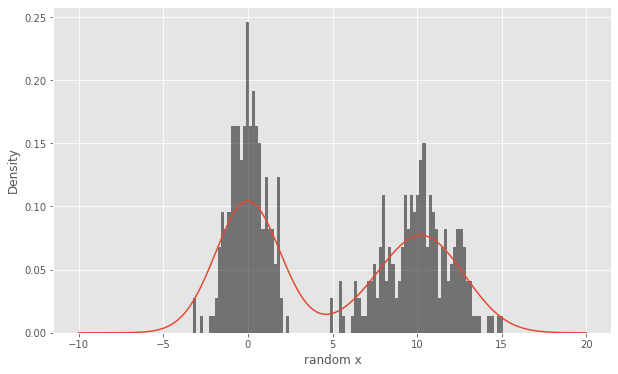

In [ ]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
spaces = (np.arange(3000) - 1000)/100
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.5, color='k', density=True)
values.plot.kde(bw_method='scott', ind=spaces)
# values.plot(kind='kde', style='k--')
# plt.gcf().axes[0].set_xlabel("random x")
plt.xlabel("random x")

### 8.2.4 Scatter plots
산포도는 2개의 변수 간 상관관계를 보고자 할 때 유용하다.
- matplotlib에서 제공하는 scatter 함수를 이용하여 산포도 그릴 수 있다

---

이번 절에서는 [Statsmodel 프로젝트](http://statsmodels.sourceforge.net)에서 macrodata 데이터를 불러와서:
- 몇 가지 변수를 선택하고 
- 로그차를 구해보자.

>[참고] statsmodel 프로젝트:

>Statsmodels는 사용자가 데이터를 탐색하고, 통계 모델을 추정하고, 통계 테스트를 수행 할 수있는 Python 모듈이다:
- 다양한 유형의 데이터 및 통계 추정치에 대한 기술 통계, 통계 테스트, 도표 함수 및 결과 통계량을 이용할 수 있다. 
- Python은 Statsmodels을 통해 통계 계산 및 데이터 분석 요구를 완벽하게 충족한다. 

> 주요한 특징은 다음과 같다:
- Linear regression models
- Generalized linear models
- Discrete choice models
- Robust linear models
- Many models and functions for time series analysis
- Nonparametric estimators
- A collection of datasets for examples
- A wide range of statistical tests
- Input-output tools for producing tables in a number of formats (Text, LaTex, HTML) and for reading Stata files into NumPy and Pandas.
- Plotting functions
- Extensive unit tests to ensure correctness of results
- Many more models and extensions in development

macrodata에 대한 설명: http://www.statsmodels.org/dev/datasets/generated/macrodata.html
>US Macroeconomic Data for 1959Q1 - 2009Q3: 203row, 14 variables.

>변수 설명
```
year      - 1959q1 - 2009q3
quarter   - 1-4
realgdp   - 실 GDP: Real gross domestic product (Bil. of chained 2005 US$,
            seasonally adjusted annual rate)
realcons  - 실 개인소비지출: Real personal consumption expenditures (Bil. of chained
            2005 US$, seasonally adjusted annual rate)
realinv   - 총 민간 투자액: Real gross private domestic investment (Bil. of chained
            2005 US$, seasonally adjusted annual rate)
realgovt  - 연방 소비지출 및 총 투자: Real federal consumption expenditures & gross investment
            (Bil. of chained 2005 US$, seasonally adjusted annual rate)
realdpi   - 민간 가처분 소득: Real private disposable income (Bil. of chained 2005
            US$, seasonally adjusted annual rate)
cpi       - 소비자 물가 지수: End of the quarter consumer price index for all urban
            consumers: all items (1982-84 = 100, seasonally adjusted).
m1        - M1 액면가주식(즉시 현금화가능한 액면가 주식): End of the quarter M1 nominal money stock (Seasonally
            adjusted)
tbilrate  - 평균 단기증권 국채: Quarterly monthly average of the monthly 3-month
            treasury bill: secondary market rate
unemp     - 실업율: Seasonally adjusted unemployment rate (%)
pop       - 분기말 총 인구: End of the quarter total population: all ages incl. armed
            forces over seas
infl      - 인플레이션 율: Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
realint   - 이자율: Real interest rate (tbilrate - infl)
```

In [108]:
macro = pd.read_csv('./macrodata.csv')
macro.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


data.diff(periods=1, axis=0):
- df에 대한 n차 차분을 리턴한다.(1차 차분: 이전 index의 value를 현 index value에서 빼기)
- periods는 차분을 위한 n을 지정한다.
- axis는 차분을 발생시킬 index의 axis를 지정

소비자물가지수(cpi), m1(액면가주식), 평균 단기증권(tbilrate), 실업률(unemp) 데이터만 보자.

In [109]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
np.log(data.head())

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659


In [110]:
np.log(data.head()).diff()

,cpi,m1,tbilrate,unemp
0,NaN,NaN,NaN,NaN
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108


In [111]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


log 차분된 trans_data의 산포도를 그려보자.

Text(0, 0.5, 'log unempl')

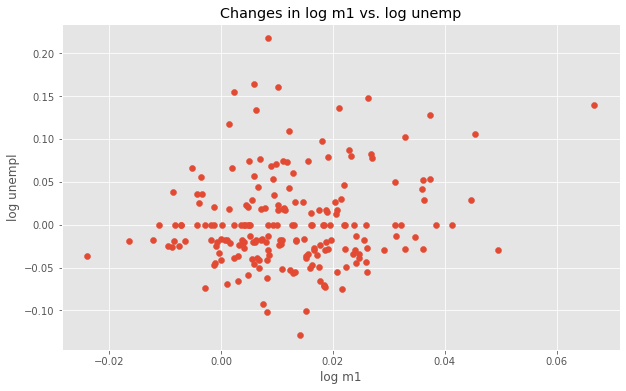

In [114]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))
plt.xlabel("log m1")
plt.ylabel("log unempl")

In [ ]:
pd.scatter_matrix?

Object `pd.scatter_matrix` not found.


In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

아래에서 color='k' 옵션이 포함된 경우:
- ValueError가 발생하며, 아래와 같은 에러 메시지가 나타남.
>Supply a 'c' kwarg or a 'color' kwarg but not both; they differ but their functionalities overlap.

- 이를 방지하기 위해, color 옵션을 제거하고 실행한다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1fe2a3490>,
      dtype=object)

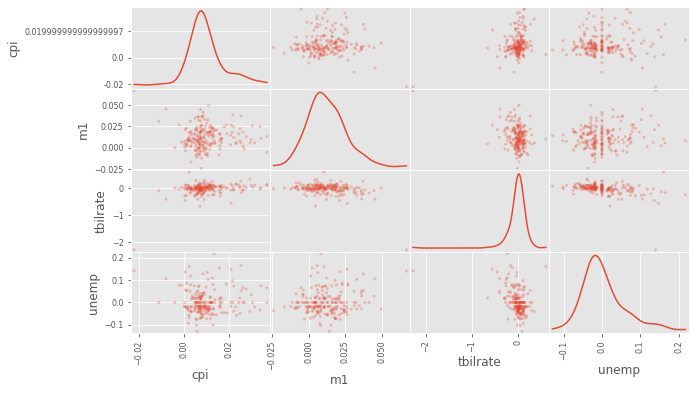

In [115]:
# pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
pd.plotting.scatter_matrix(trans_data, diagonal='kde', alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1fb129910>,
      dtype=object)

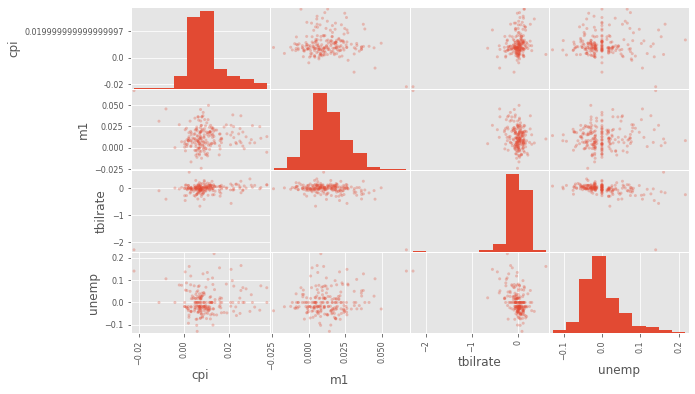

In [118]:
pd.plotting.scatter_matrix(trans_data, diagonal='hist', alpha=0.3)

## 8.3 Plotting Maps: Visualizing Haiti Earthquake Crisis data
[우샤히디(Ushahidi)](http://ushahidi.com/)는 비영리 소프트웨어 기업으로서
- 문자 메시지를 통해 자연재해나 지리적인 사건과 관련된 정보를 크라우드 소싱하고 
- 이렇게 모인 많은 데이터를 웹 사이트를 통해 공개하여 분석이나 시각화에 활용할 수 있도록 하고 있다.

#### 2010년 1월 12일 아이티 지진의 영향
1. 진도 7.0이 포트 프 프린스 근처에서 공격했습니다.
2. 3,500,000 명의 사람들이 지진의 영향을 받았다.
3. 사망 한 것으로 추정되는 22 만명
4. 30 만 명이 부상 당함
5. 188,383 채의 주택이 심하게 손상되었고 105,000 명이 지진으로 파괴 (총 293,383 건), 150 만 명이 노숙자가되었습니다.
6. 지진 발생 후 1900 만 입방 미터의 잔해와 파편이 포트 오 프린스에 있었고 런던에서 베이루트까지 끝이 갈 곳이없는 선적 컨테이너 선을 채우기에 충분했습니다.
7. 4,000 개의 학교가 손상되거나 파괴되었습니다.
8. 포트 프 프린스의 공무원 중 25 %가 사망했다.
9. 정부 및 행정 건물의 60 %, 포르토 프랭스 학교의 80 %, 남서부 학교의 60 %가 파괴되거나 손상되었습니다.
10. 포르토 프랭스에 60 만 명이 넘는 사람들이 집을 나갔고 대부분 호스트 패밀리에 머물렀다.
11. 절정기에는 폭풍우와 홍수로 인한 위험에 처한 10 만 명을 포함하여 150 만 명이 캠프에 거주했습니다.
12. 지진과 관련이 없지만 원조 대응에 어려움을 낳은 것은 2010 년 10 월 콜레라의 발발이었습니다. 
2011 년 7 월까지 5,899 명이 발병하여 사망했고 216,000 명이 감염되었습니다

**2010년에 수집된 아이티** 지진 데이터와 그 여파에 대한 자료를 내려받아 어떻게 분석하고 시각화하는지 살펴보자.

>이번 절에서 사용하는 basemap 패키지는 과거 python2.x 만을 지원했으니,
현재는 python 3.x에서도 사용가능하다.
>
>아래와 같이 설치할 수 있다.
```sh
conda install basemap
```
>자세한 내용은 https://gist.github.com/dannguyen/eb1c4e70565d8cb82d63 참고.

In [ ]:
data = pd.read_csv('./Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial          3593 non-null   int64  
 1   INCIDENT TITLE  3593 non-null   object 
 2   INCIDENT DATE   3593 non-null   object 
 3   LOCATION        3592 non-null   object 
 4   DESCRIPTION     3593 non-null   object 
 5   CATEGORY        3587 non-null   object 
 6   LATITUDE        3593 non-null   float64
 7   LONGITUDE       3593 non-null   float64
 8   APPROVED        3593 non-null   object 
 9   VERIFIED        3593 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


- Serial: 사건번호. 각각의 관측자가 이벤트를 보내온 일련번호
- 사건 제목, 사건 일자, 위치, 설명, 사건 카테고리, 경도, 위도, 승인여부, 확인여부 등의 데이터

In [ ]:
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


#### 1) 요약 데이터 보기
describe 메소드는 수치형 변수에 대한 대표값들을 보여준다.

In [ ]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


pandas의 DataFrame에 대한 요약 데이터를 제공하는 pandas-summary 모듈을 이용해보자.

- 아래 명령은 windows에서 anaconda3을 설치한 이후, 가상환경으로 python2.7을 설치한 경우 실행되지 않는다.
- 따라서 python27 프롬프트에서 설치하도록 한다.

In [ ]:
!pip install pandas-summary

In [ ]:
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(data)
dfs.columns_types

categorical    5
numeric        3
bool           2
Name: types, dtype: int64

In [ ]:
dfs.columns_stats

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
counts,3593,3593,3593,3592,3593,3587,3593,3593,3593,3593
uniques,3593,3438,3181,2759,3536,503,2468,2573,2,2
missing,0,0,0,1,0,6,0,0,0,0
missing_perc,0%,0%,0%,0.03%,0%,0.17%,0%,0%,0%,0%
types,numeric,categorical,categorical,categorical,categorical,categorical,numeric,numeric,bool,bool


In [ ]:
dfs['Serial']

mean                            2080.28
std                              1171.1
variance                    1.37148e+06
min                                   4
max                                4052
mode                                  4
5%                                194.6
25%                                1074
50%                                2163
75%                                3088
95%                              3829.4
iqr                                2014
kurtosis                       -1.18794
skewness                      -0.118416
sum                             7474437
mad                             1011.18
cv                             0.562954
zeros_num                             0
zeros_perc                           0%
deviating_of_mean                     0
deviating_of_mean_perc               0%
deviating_of_median                   0
deviating_of_median_perc             0%
top_correlations                       
counts                             3593


#### 2) 이상치 제거
1) 다른 data는 3593개의 자료가 있는 데, CATEGORY 열은 6개의 결측치가 있어 3587개의 자료가 있다.

각각의 레코드는 익명의 사용자가 휴대폰으로 응급상황이나, 다른 문제가 발생했음을 알려온 내역이다.
- 각 사건 내역에는 시간정보와 위경도 정보를 포함하고 있다.

In [ ]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [ ]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

2) 이제 위치 정보가 haiti가 아닌 정보와 CATERGORY가 누락된 레코드를 제거하자.
- LATITUDE와 LONGITUDE가 haiti 지역과 다른 값을 갖는 자료는 제거한다.
![](http://nbviewer.jupyter.org/github/re4lfl0w/ipython/blob/master/books/python_data_analysis/images/it_earthquake.png)

>data.describe() 메소드는 연속형 변수에 대한 summay data를 제공한다.

In [ ]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [ ]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


#### 3) CATEGORY 데이터의 사전화
CATEGORY 데이터의 특징:
- 각 카테고리 필드에는 다수의 카테고리가 존재
- 각 카테고리는 코드와 영어, 불어 코드 이름으로 구성
- 예) 정규식: `\w+\.\s+[\|\w+]*`, 실제 값: `1. Urgences | Emergency, 3. Public Health, `
- 즉, `code. 값1[ | 값2], [code. 값1[ | 값2], ]`와 같이 구성되어 있다.

이를 위해:
1. 카테고리 필드의 각 레코드를 `,`로 분리하고, 앞뒤 공백은 제거하여 리스트를 생성하고
2. 이 리스트 형 레코드를 집합으로 변경 한 후, 모든 레코드를 합한 집합을 생성하고,
3. 생성된 전체 집합의 각 원소를 code와 names로 분리한다.

In [ ]:
# str1  ,  str2  => [str1, str2]
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

# data["CATEGORY"] => sorted_set(to_cat_list)
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

# Set.a => Set.(a.code, a.name)
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

위 get_all_categories 함수의 code에서:
- `*cat_sets`는 (set0, set1, ...)인 tuple에 대한 `*args` 형식의 다중 인수 지정이다.
- 이를 통해 개별 set_i는 전체 집합으로 통합되고,
- 이 전체집합을 sorted 내장 함수에 의해 list로 반환된다.

get_english 함수는:
- 전체 집합의 원소 또는 get_all_categories 함수에 의해 반환된 list의 성분을
- code, name으로 변경하는 데,
- 이 함수가 잘 동작하는 지 아래와 같이 확인해볼 수 있다.

In [ ]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

get_all_categories 함수가 category 집합을 잘 생성하는 지 아래와 같이 확인해볼 수 있다.

In [ ]:
all_cats = get_all_categories(data.CATEGORY)
all_cats[:5]

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire']

In [ ]:
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

위의 dict는 아래와 같은 방법으로 generator에 의해 생성된다.
>참고로 key가 중복된 경우, 나중에 입력된 value에 의해 재지정된다.

In [ ]:
dict([("a", 1), ("b", 2), ("a", 1.2)])

{'a': 1.2, 'b': 2}

In [ ]:
dict([get_english(all_cats[0])])

{'1': 'Emergency'}

원하는 코드집이 잘 생성되었는지 확인해보자.

In [ ]:
english_mapping['6c']

'Earthquake and aftershocks'

#### 4) dummy code 필드 생성
1. 이제 생성된 코드집을 이용하여 CATEGORY 필드로부터 dummy code를 생성하고,
2. 이 생성된 dummy code를 data에 연결하자.

이를 위해 먼저 code list를 생성한다.

In [ ]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

# code list
all_codes = get_code(all_cats)
# 과연 중복된 값이 있을까?
pd.Series(all_codes).duplicated().sum()

2

아래와 같이 code와 name이 분리되지 않는 all_cats에서 english_mapping을 생성할 때:
- 2c 코드의 name은 "Security Concern"으로 재지정되고,
- 6c 코드의 name은 "Earthquake and aftershocks"으로 재지정된다.
- 따라서 english_mapping 자체는 unique하지만 정보 손실이 발생한다.

In [ ]:
all_cats

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

문제 해결을 위해, 
1. 2c와 6c에 대한 코드 변경을 검토해볼 수 있다.
2. 중복된 name을 list로 통합시킨다.

---
그러나, 일단은 현 상태를 유지하면서 분석을 실시하자:

먼저, data와 동일한 크기의 레코드를 갖는 dummy code용 데이터프레임을 생성하고,

In [ ]:
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)
dummy_frame.iloc[:5, :5]

,1,1a,1b,1c,1d
0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0


이상치를 제거하였기 때문에(tahiti 위치와 null category 레코드 제거), row index에 빈 구멍이 있다.

In [ ]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 355.2 KB


1. 이제 data의 각 row별 codes(code list)를 생성하고,
2. dummy_frame의 각 row에서 code가 있는 cell의 value를 1로 변경하고
3. data와 dummy_frame을 join한다.
    - 이때 index가 완전히 동일하기 때문에 how 옵션은 의미없다.

In [ ]:
# to_cat_list: str1  ,  str2  => [str1, str2]
# get_code: seq.a => seq.#
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [ ]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


#### 5) CATEGORY 정보를 지도에 시각화
matplotlib의 확장 툴킷인 basemap을 사용하여 지도 위에 2차원 도표를 그린다.
- basemap은 여러 지도 투영법을 지원하며 
- 위경도 좌표를 2차원 평면 matplotlib의 좌표로 변환한다.

이제 data를 이용하여 간단한 흑백 아이티 지도를 그리는 함수를 위해 basemap 패키지를 설치하자.

#### basemap 패키지 설치
- 이를 위해서는 basemap 패키지를 설치해야 한다.
- 아래와 같이 anaconda command 상에서 설치할 수 있다.
- 참고로, anaconda3을 사용하는 경우는 anaconda3 prompt를 실행하면 된다.

```sh
(C:\Users\great\Anaconda2) C:\Users\great>conda search mpl_toolkits
Fetching package metadata .........

(C:\Users\great\Anaconda2) C:\Users\great>conda search basemap
Fetching package metadata .........
basemap                      1.0.7               np110py27_0  defaults
                             1.0.7               np111py27_0  defaults
                             1.0.7               np112py27_0  defaults
                             1.0.7               np113py27_0  defaults
                             1.0.7                np17py27_0  defaults
                             1.0.7                np18py27_0  defaults
                             1.0.7                np19py27_0  defaults

(C:\Users\great\Anaconda2) C:\Users\great>conda install basemap
Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment C:\Users\great\Anaconda2:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    requests-2.14.2            |           py27_0         698 KB
    pyopenssl-16.2.0           |           py27_0          68 KB
    basemap-1.0.7              |      np111py27_0       120.5 MB
    conda-4.3.22               |           py27_0         520 KB
    ------------------------------------------------------------
                                           Total:       121.8 MB

The following NEW packages will be INSTALLED:

    basemap:   1.0.7-np111py27_0

The following packages will be UPDATED:

    conda:     4.2.13-py27_0     --> 4.3.22-py27_0
    pyopenssl: 16.0.0-py27_0     --> 16.2.0-py27_0
    requests:  2.11.1-py27_0     --> 2.14.2-py27_0

Proceed ([y]/n)? y

Fetching packages ...
requests-2.14. 100% |###############################| Time: 0:00:00   1.80 MB/s
pyopenssl-16.2 100% |###############################| Time: 0:00:00   4.99 MB/s
basemap-1.0.7- 100% |###############################| Time: 0:00:25   4.92 MB/s
conda-4.3.22-p 100% |###############################| Time: 0:00:00   4.80 MB/s
Extracting packages ...
[      COMPLETE      ]|##################################################| 100%
Unlinking packages ...
[      COMPLETE      ]|##################################################| 100%
Linking packages ...
[      COMPLETE      ]|##################################################| 100%

(C:\Users\great\Anaconda2) C:\Users\great>exit
```

아래와 같은 방법으로 Jupyter Notebook에서도 직접 설치할 수 있다. 

python2가 아나콘다의 가상환경으로 설치가 된 경우 설치되지 않는다. 이 경우, 아나콘다 python2 프롬프트에서 설치한다.

In [ ]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


pip로는 더 이상 설치 지원하지 않는다. conda로 설치하거나,
```bash
!conda install -c conda-forge basemap
```

windows 인 경우라면 https://www.lfd.uci.edu/~gohlke/pythonlibs/#basemap 에서 wheel 파일을 다운로드하여 설치한다.

In [ ]:
!conda search basemap

Fetching package metadata .........


colabs에서는 https://community.insaid.co/hc/en-us/community/posts/360048243414-Installing-Importing-of-Basemap-in-Google-Colab 에 따라 설치한다.

In [ ]:
!pip install pyproj==1.9.6

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev

     |████████████████████████████████| 2.8 MB 5.3 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702471 sha256=58b575e724a29966c02bb499b3ca8ef8d970a3f75f8c04333db541a8e1d69093
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     / 129.7 MB 34.1 MB/s
ERROR: https://github.com/matplotlib/basemap/archive/master.zip do

In [ ]:
# !pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install https://github.com/matplotlib/basemap/archive/v1.0.7.tar.gz

  ERROR: HTTP error 404 while getting https://github.com/matplotlib/basemap/archive/v1.0.7.tar.gz
ERROR: Could not install requirement https://github.com/matplotlib/basemap/archive/v1.0.7.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://codeload.github.com/matplotlib/basemap/tar.gz/v1.0.7 for URL https://github.com/matplotlib/basemap/archive/v1.0.7.tar.gz


In [ ]:
!pip install setuptools


basemap에 대한 자세한 사용법은 [여기](http://matplotlib.org/basemap/)서 확인할 수 있다.

아래 basemap 인스턴스 생성 code에 대해 간략히 설명하면:
- Basemap 생성자의 인수로 주어진 map projection(투사) 좌표에 있는 해안선 구조를 생성한다.
- ax 인수는 지도를 그릴 axes 객체를 지정하는 데, 
    - default "None"인 경우, plt.gca()로 확인되는 현재 활성화된 axes가 지정된다.
    - axes 객체는 그림을 그려질 figure 객체의 add_subplots 메소드에 의해 생성된 특정 캔버스 구역이라 생각하면 된다.
- projection은 map 투사도의 투사방법을 지정하며, default는 'cyl'이다.
    - 기본적으로 지구는 3d이지만 map 2d에서 그려지므로, map을 위한 투사방법이 필요하다.
    - 'cyl'은 원통형 등거리 투사방법으로서 보통의 지도에서 사용한다.
    ![](http://www.math.cornell.edu/~dwh/books/eg99/Ch16/37850c61.jpg)
    - 아래에서 지정된 'stere'는 Stereographic은 아래 그림과 같은 투사방법이다.
    ![](http://www.math.cornell.edu/~dwh/books/eg99/Ch16/37850c63.jpg)
    - 투사방법에 대한 더 상세 내용은 [여기](http://www.math.cornell.edu/~dwh/books/eg99/Ch16/Ch16.html)서 확인할 수 있다.
- map projection region 설정:
    - llcrnrlon: map 영역의 lower left corner의 longitude(degree) 값
    - llcrnrlat: map 영역의 lower left corner의 latitude(degree) 값
    - urcrnrlon: map 영역의 upper right corner의 longitude(degree) 값
    - urcrnrlat: map 영역의 upper right corner의 latitude(degree) 값
- map projection region 설정 2:
    - width: map region의 projection coordinates 상에서의 폭(meter)
    - height: map region의 projection coordinates 상에서의 높이(meter)
    - lon_0: map region의 중심 경도(degree)
    - lat_0: map region의 중심 위도(degree)
- resolution: 분계선 db의 해상도. 
    - 지정 가능한 값: c (crude), l (low), i (intermediate), h (high), f (full) or None.
    - default 값: c
        
#### basemap 메소드
drawcoastlines(linewidth=1.0, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
- 해안선을 그린다. matplotlib.patches.LineCollection object를 리턴.

drawcounties(linewidth=0.1, linestyle='solid', color='k', antialiased=1, facecolor='none', ax=None, zorder=None, drawbounds=False)
- Draw county boundaries in US. matplotlib.patches.LineCollection object를 리턴.

drawcountries(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
- Draw country boundaries. matplotlib.patches.LineCollection object를 리턴.

drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
- Draw state boundaries in Americas. matplotlib.patches.LineCollection object를 리턴.

drawrivers(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
- Draw major rivers. matplotlib.patches.LineCollection object를 리턴.

etopo(ax=None, scale=None, \*\*kwargs)
- etopo(지형과 수심에 대한 dataset)가 강조된 image를 그린다. matplotlib.image.AxesImage를 리턴.

fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
- Fill continents. matplotlib.patches.Polygon를 리턴.

imshow(\*args, \*\*kwargs)
- Display an image over the map (see matplotlib.pyplot.imshow documentation).
- matplotlib.image.AxesImage 객체를 리턴.


**readshapefile**(shapefile, name, drawbounds=True, zorder=None, linewidth=0.5, color='k', antialiased=1, ax=None, default_encoding='utf-8')
- Read in shape file, optionally draw boundaries on map.
- shape은 2d로 가정한다.
- Point, MultiPoint, Polyline and Polygon shapes에 대해서만 동작한다.
- vertices/points는 지리좌표(lon/lat) 내에 있어야 한다.
- shapefile: shpefile 성분에 대한 경로를 지정.
    - 폴더까지만 지정하며, 그 폴더 안에는 최종폴더명에 의한 다음 확장자 파일들이 존재한다.
    - `.shp`, `.shx`, `.dbf`
- name: map projection 좌표계에 있는 shapefile 벡터 및 점들을 담는 Basemap 속성의 이름을 지정.


#### basemap 객체를 이용한 좌표변환
basemap 객체인 m을 이용하여 좌표변환을 수행할 수 있다
- m(lon, lat): lon/lat(degree)를 map 투사 좌표 x, y로(meter) 변경
- m(x, y, inverse=True): map 투사 좌표 x, y를(meter) lon/lat(degree)로 변경

#### basemap을 활용한 다양한 예시들
https://matplotlib.org/basemap/users/examples.html

---
**먼저 haiti 지도를 그릴 함수를 생성하는 함수는 다음과 같이 정의한다:**
- 그래프가 그려질 parate인 ax를 설정하고,
- 그래프가 표현할 위경도의 상하한과 그 해상도를 설정하고,
- 그래프에 표시할 map 객체를 지정한다:
 - 해안선
 - 주경계선
 - 국경계선

- 이 함수로부터 경도 x, 위도 y를 뽑아내어, plot 함수로 그래프를 생성한다.

In [ ]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

KeyError: 'PROJ_LIB'

먼저 아래와 같은 이벤트를 지도에 그려보자.

|Code|Explain|
|---|---|
|1 | Emergency|
|2a |Food Shortage|
|3c |Medical equipment and supply needs |
|7a | Food distribution point|

아래 코드는 상황에 따라서 수분이 걸린다. 에러라 생각하지 않고 차분히 기다린다.

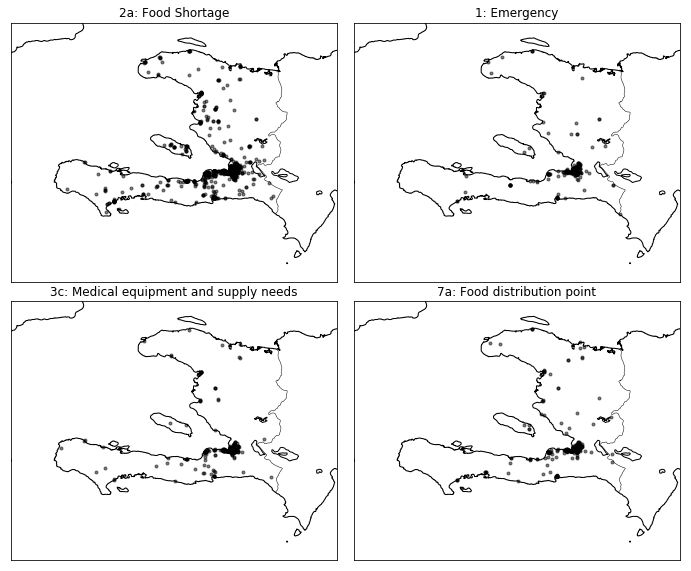

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71
 
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

fig

- axes.flat은 2x2 2d array를 1d array로 flattening하기 위함.
- 적정 명칭의 subplot에 대한 title을 생성한다.

아래와 같이 함수를 이용하여도 동일한 그림을 그릴 수 있다.
- to_plot은 위에서 정의한 그래프에 그릴 이벤트 코드 리스트.

In [ ]:
def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

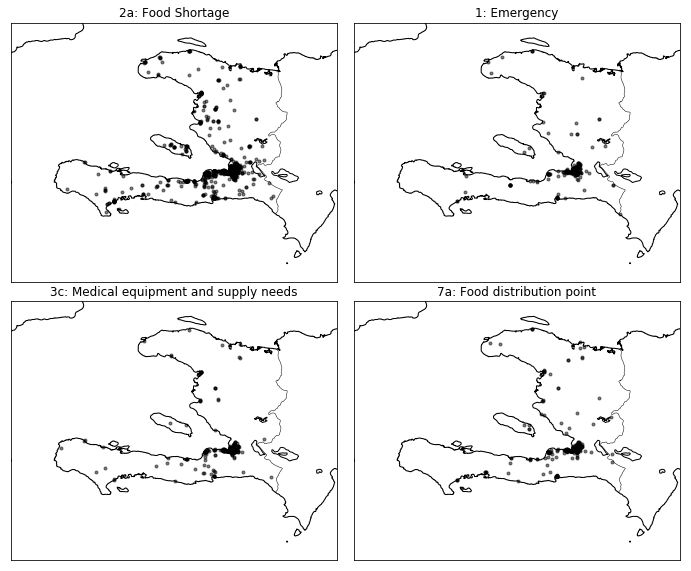

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

make_plot()
fig

함수를 이용한 그림을 그리는 방법:
- fig, axes를 make_plot 함수 정의 이전에 생성하지 않고,
- make_plot 함수 실행 직전에 인스턴스를 생성해야 한다.

위 그림을 보면, 대부분의 data records가 가장 유명한 도시인 Port-au-Prince에 집중되어 있다.

basemap은 shapefile로 부터 추가적인 지도 데이터를 얻어 그 위에 덮어 씌울 수 있다.
- /PortAuPrince_Roads 폴더에는 도로 정보를 담고 있는 shapefile이 있다.
- Basemap 객체에는 readshapefile 메소드로 도로 데이터를 추가할 수 있다.

In [ ]:
shapefile_path = '../datasets/haiti/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x20f36710>)

In [ ]:
tp = m.readshapefile(shapefile_path, 'roads')
print (type(tp))

<type 'tuple'>


tp는 어떤 정보를 담고 있을까?
- 첫 2개의 성분인 1583, 3은 어떤 정보를 담고 있는 지 잘 모르겠지만,
- 뒤 2개의 성분은 "PortAuPrince"의 경위도 좌표를 나타낸다.

즉, lllat=18.40, lllon=-72.74이고, urlat=18.714, urlon=-71.97이다.

이제 이 좌표를 이용하여 "PortAuPrince" 지역만을 확대해서 표시해보자.

>참고로, 
>- 아래와 같이 list1을 list에 추가할 때는 list.extend(list1)를 사용하며,
>- list에 성분 하나를 추가할 때는 list.append('a')를 사용한다.

In [ ]:
latlon = []
latlon.extend(tp[2][:2])
latlon.extend(tp[3][:2])
latlon

[-72.749246, 18.409952, -71.973789, 18.7147105]

In [ ]:
plt.close("all")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 10))
fig.subplots_adjust(hspace=0.05)

to_plot = ['2a', '1']

lllat=latlon[1]; urlat=latlon[3]; lllon=latlon[0]; urlon=latlon[2]

make_plot()

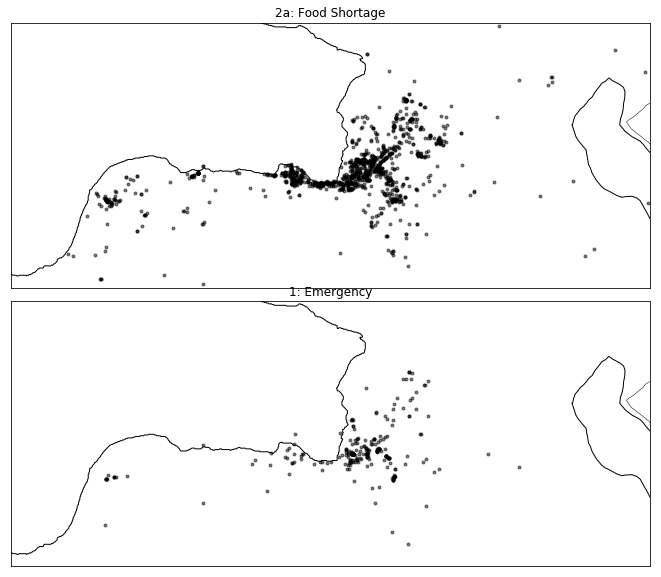

In [ ]:
fig

- m.plot() 이전에 m에 readshapefile을 적용해야 plot에 반영된다.
- make_plot() 함수에서는 m 인스턴스를 새로 생성하므로, road가 그려지지 않았다.

아래와 같이 m.plot 이전에 실행시키면, road 정보가 지도에 표시됨을 확인할 수 있다.

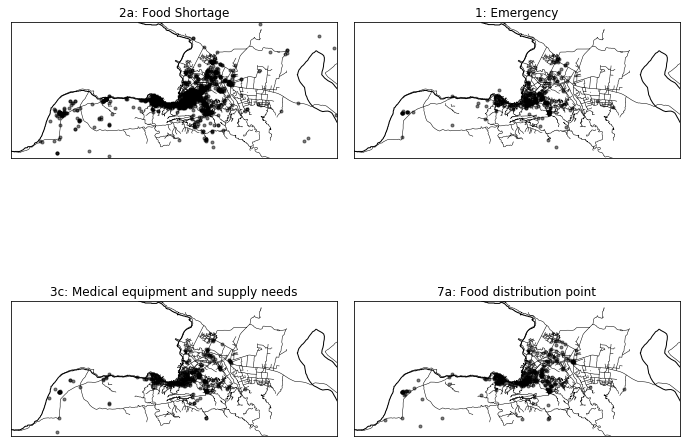

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=latlon[1]; urlat=latlon[3]; lllon=latlon[0]; urlon=latlon[2]

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
    shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
    m.readshapefile(shapefile_path, 'roads')

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

fig

## 8.4 파이썬 시각화 도구 생태계
matplotlib은 파이썬에서 그래프를 그리기 위한 도구
- 통계 그래픽을 만들고 표시하는데 있어서 matplotlib은 다소 결점
- R에서 ggplot2와 trellis 패키지에 익숙한 사용자들은 실망할 수 있지만, 
- plt.style.use("ggplot")을 사용해보면, 그나마 아쉬움이 덜 할 것이다.
- 다양한 [gallery](http://matplotlib.org/2.0.2/gallery.html)와 [예제](http://matplotlib.org/2.0.2/examples/index.html), [스크린샷](http://matplotlib.org/2.0.2/users/screenshots.html) 등을 활용하면 멋진 그래프를 그리는 데 도움이 될 것이다.

다양한 다른 시각화 도구를 살펴보자.

### 8.4.1 Chaco
정적 그래프와 대화형 시각화 2가지 모두에 잘 어울리는 툴킷
- 데이터 내부 관계에 따라 복잡한 시각화 잘 표현
- 그래프 요소와의 인터렉션을 좀 더 잘 지원할 뿐만 아니라 
- plotting 속도도 아주 빨라서 대화형 GUI 애플리케이션을 작성할 때 유용한 선택이다.

다양한 example은 [여기](http://docs.enthought.com/chaco/user_manual/tutorials_and_examples.html)서 확인할 수 있다.

### 8.4.2 mayavi
오픈 소스 c++ 그래픽 라이브러리인 VTK로 작성된 3d 그래픽 툴킷으로 matplotlib 처럼 IPython에 통합되어 대화형으로 사용하기 편리하다.
- [mayavi](http://docs.enthought.com/mayavi/mayavi/)로 생성된 3d 그래프는 마우스와 키보드를 사용해서 돌려보거나 확대/축소가 가능하다.
- 이때문에 interactive한 부분은 적지만, WebGL과 같은 기술의 훌륭한 대안이 된다.
![](http://docs.enthought.com/mayavi/mayavi/_images/example_canyon.jpg)

3d 그래픽을 위해 matplotlib 확장 toolkit인 [mplot3d](http://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#toolkit-mplot3d-tutorial)를 사용해 보는 것도 권장할 만하다.
![](http://matplotlib.org/2.0.2/_images/subplot3d_demo.png)

### 8.4.3 기타 패키지
- PySqt: Qt 어플리케이션 F/W인 PyQt에서 GUI 어플리케이션으로 사용됨
- Veusz
- gnuplot-py
- biggles

### 8.4.4 시각화 도구의 미래
웹 기술 기반의 시각화, 즉 자바스크립트 기반의 시각화는 피할 수 없는 미래
- 이미 많은 종류의 정적 혹은 대화형 시각화를 플래시나 자바스크립트를 통해 사용
- d3.js와 거기서 파생된 다양한 다른 프로젝트 같은 새로운 툴킷이 계속 나옴

웹 기반이 아닌 환경에서의 시각화는 별로 진전이 없다.
- 파이썬, R과 같은 다른 데이터 분석과 통계 컴퓨팅 환경에서도 마찬가지 현상
- 도전 과제는 pandas와 웹브라우저 같은 데이터 분석 및 준비 도구간의 밀접한 통합을 이뤄내는 것
- 예를 들면 최근 spark 진영에서 주목을 받고 있는 zeppelin 등이 그 예가 되겠다.

### 8.4.5 다양한 시각화 도구 소개 자료
[데이터 시각화 라이브러리 목록](http://codefactory.kr/data-visualization-libraries/)
- 2015년에 작성된 자료인데, 유료를 포함해 제법 방대한 양을 제공하고 있다.

[데이터를 시각화할 수 있는 14가지 툴 모음](http://www.fbml.co.kr/2014/08/14/14-tools-data-visualization/)
- 2014년에 작성된 블로구 자료로 주로 무료 툴을 소개하고 있음

[무료 데이터 시각화 및 분석 툴](https://www.google.co.kr/search?q=%EB%AC%B4%EB%A3%8C+%EB%8D%B0%EC%9D%B4%ED%84%B0+%EC%8B%9C%EA%B0%81%ED%99%94&oq=%EB%AC%B4%EB%A3%8C+%EB%8D%B0%EC%9D%B4%ED%84%B0+%EC%8B%9C%EA%B0%81%ED%99%94&aqs=chrome..69i57j69i61.331j0j4&sourceid=chrome&ie=UTF-8)
- 구글 docs 자료로 언제 작성되었는 지 확인되지 않으나 표 형식으로 유용

최근(2016)년 구글이 공개한 무료 데이터 시각화 툴인 [data studio](https://www.google.com/analytics/data-studio/)
- example [ACME](https://datastudio.google.com/org//reporting/0B_U5RNpwhcE6SF85TENURnc4UjA/page/1M/preview): 홍보용 웹사이트에 대한 방문자 추이 시각화

파이썬을 이용한 데이터 시각화 교재: [파이썬 데이터 시각화 마스터](http://www.acornpub.co.kr/book/mastering-python-visualization)
![](http://www.acornpub.co.kr/tb/detail/book/iz/vj/1493283127yRg6oruQ.jpg) ![](http://image.aladin.co.kr/product/11108/74/cover/8994797696_1.jpg)
![](http://image.aladin.co.kr/product/5120/21/cover/8960776688_1.jpg)

참고로, 국내에서 제공하는 지도 OpenAPI 서비스로 국토교통부에서 제공하는 http://map.vworld.kr 서비스가 있으나, 단지, javascript 만을 제공한다.

## 8.8 pyplot 요약
matplotlib는 python 시각화 도구인데, 여기에는 pylab과 pyplot이 있다. 둘 모두 matlab과 유사한 시각화 인터페이스를 제공하는 데, pylab은 pyplot과 numpy를 동일한 namespace에서 사용할 수 있는 장점이 있으나, 실제 프로그래밍에서는 numpy와 pyplot을 별도로 사용하는 것이 유리하기 때문에, pyplot 서브모듈을 사용하는 것을 권장한다.

보통 다음과 같이 모듈을 임포트하여 시작한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(12, 8))

figsize는 inch 단위로 그래프의 width와 height를 정의한다.

### 8.8.1 pyplot의 주요 요소
![](https://matplotlib.org/_images/anatomy1.png)
#### 1) figure
matplotlib에서 그래프는 figure 내에 존재한다. 그래프의 모든 요소는 figure의 속성으로 전달된다. figure 내에는 여러 그래프를 생성할 수 있는데, 각각의 그래프는 subplots 명령으로 Axes로 할당된다.

figure 내에 여러 Axes가 존재할 수 있지만, 적어도 하나의 Axes는 존재해야 하며, 보통 자동으로 할당된다.

또한 figure는 모든 Axes에 공통으로 적용되는 titles, lengends 등을 추적하여 보존한다.

figure는 다음과 같이 인스턴스를 생성할 수 있으나, plt.plot 명령으로 자동으로 Axes와 함께 생성할 수도 있다.

```python
fig = plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None)
```

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

위에서 언급했듯이 빈 Figure 객체로는 그래프를 생성할 수 없으므로, add_subplot 메소드로 최소한 하나의 Axes를 생성해야한다.

In [4]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3

활성화된 Figure 인스턴스는 plt.gcf()로 확인하며, Axes는 plt.gca()로 확인한다.

1.   항목 추가
2.   항목 추가



`plt.plot()`으로 그래프를 그리면, matplotlib는 가장 최근의 Figure 객체와 그 subplot에 그림을 그린다.
- 만약 figure 객체가 없다면, 위에 언급했듯이 자동으로 figure 객체를 생성하며
- 만약 figure 객체는 있는데 subplot이 없다면, subplot을 하나 생성한다.
- 이런 경우, Figure 객체와 subplot을 생성하는 과정이 생략될 수 있다. (아주 일반적이다!)
- `k--` 옵션은 검은 점선을 그리기 위한 style 옵션이다.

In [5]:
from numpy.random import randn
# plt.plot(randn(50).cumsum(), 'k--')
ax3.plot(randn(50).cumsum(), 'k--')
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

그래프를 생성했으나, 아직 화면에 drawing을 하지 않았다. 화면에 drawing을 하는 객체는 canvas인데 사용자가 직접 인스턴스를 생성할 경우는 거의 없다.

drawing을 하기 위해 fig 인스턴스를 호출하거나, plt.show() 함수를 호출한다.

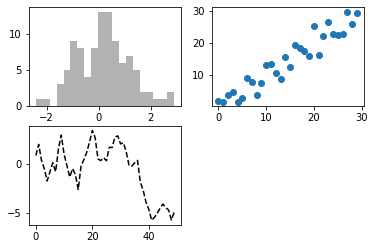

In [6]:
# plt.show()
fig

- plot.show()는 모든 Figure 객체를 그린다.
- fig는 지정한 Figure 인스턴스만 그린다.

생성한 Figrue 인스턴스를 종료하기 위해서는 plt.close()를 사용한다.
```python
close() # closes the current figure
close(fig) # closes the Figure instance fig
close(num) # closes the figure number num
close(name) # closes figure with that label name.
close('all') # closes all the figure windows
```

---
#### 2) Axes
우리말로는 축이라 해석될 터인데, matplotlib에서는 좀 더 확장된 의미로 사용된다. 여러 축들로 구성된 **그래프가 그려질 수 있는 공간**으로 이해하는 것이 적당하다. matplotlib에서는 이를 단어 그대로의 의미로서 **plot**으로 이해하는 것이 좋다고 한다.

Figure 객체는 여러 Axes를 포함할 수 있지만, 하나의 Axes는 하나의 Figrue에만 속한다.

Axes는 2D 그래프에서는 2개의 axis를, 3D 그래프에서는 3개의 axis를 가지며, 이를 통해 data limit을 책임진다. 이를 위해 Axes는 set_xlim(), set_ylim() 메소드를 갖는다.

또한 Figure 내에서 각 Axes는 label, xlim, title, legned 등을 공유할 수 있으나, 각 Axes가 별도의 값을 갖도록 설정할 수 있다.

---
#### 3) Axis
data의 범위를 제한하고(따라서 그래프 출력의 범위를 제한한다.), tick(눈금)과 ticklabel(눈금값)을 생성한다. tick의 위치는 [Locator](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.Locator)에 의해 결정되고, ticklabel은 [Formmater](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.Formatter)에 의해 형식이 주어진다.

보통은 plt.xlabel과 plt.ylabel, plt.lengend 등의 설정만으로 충분한다.

---
#### 4) Artist
Figure에서 볼 수 있는 모든 것이 Artist이다.(Figure, Axes, Axis, tick, Text, Patch, Lind2D, Legend, Table, ImageBase, Collection 등)
![](https://matplotlib.org/_images/inheritance-3c2c45b4bd2f47461e9113da50594813ad9f98d0.png)

Figure에 렌더링될 때, 모든 Artist들이 canvas에 그려진다.

대부분의 Artist들은 Axes에 고착되며, 여러 Axes에 공유되지 않고 옮겨지지도 않는다.

---
#### 5) plot 함수의 입력 type
np.array 또는 np.ma.masked_array이 plot의 입력 data가 될 수 있다.

pandas의 DataFrame이나 np.matrix 같은 array-like 객체가 입력될 때는 의도한 결과가 나오지 않을 수 있다. 가급적 np.array 객체로 변환하여 입력하는 것이 좋다.
```python
a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asndarray = a.values

b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
```

---
#### 9) Text
matplotlib는 text가 입력되는 곳에서 [TeX equation expression](https://het.as.utexas.edu/HET/Software/Matplotlib/users/mathtext.html#mathtext-tutorial)을 사용할 있다.

plt.title(r'$\sigma_i = 15$')

- r은 백슬러쉬('\')가 python 예외어가 아닌 raw character임을 명시하므로 제외하면 않된다.
- matplotlib는 built-in TeX expression parser와 layout engine 및 math 폰트를 갖는다.

### 8.8.4 코딩 스타일
matplotlib 관련 문서나 예제를 보면 보통 2가지의 코딩 스타일을 갖는데, 모두 같은 결과를 갖는다. 가급적 하나의 스타일을 유지하도록 하며, 두 스타일을 섞지는 않도록 한다.

>개발자는 [개발자 가이드](https://matplotlib.org/devel/index.html#developers-guide-index)를 준수하여 하나의 스타일로만 작업해야 한다.

공식적으로 지원되는 2가지의 코딩 스타일이 어떤 것이 있는 지 살펴보자.

#### 1) 객체형 스타일
좀더 OOP에 가깝고, 가독성이 좋으며, 좀더 학구적이다.
1. pyplot을 script의 상위에 import한다.
2. figure를 생성하고, 나머지 Artist 객체를 생성하고 사용한다.

```python
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.2)
y = np.sin(x)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(x, y)
plt.show()
``` 

---
#### 2) 함수형 스타일
많은 경우, 동일한 스타일의 그림을 데이터만 바꾸어 사용하거나, 약간의 스타일을 변경하여 반복적으로 그래프를 그리는 경우가 많다. 이런 경우라면 그래프를 그리는 함수를 작성하는 것이 유용하다.

권장되는 함수 포맷은 다음과 같다:
```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

이렇게 작성한 함수는 다음과 같이 사용한다:
```python
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker':'x'})
```
2개의 axes가 필요한 경우라면:
```python
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker':'x'})
my_plotter(ax2, data3, data4, {'marker':'o'})
```

### 8.8.5 matplotlib의 Backend
많은 문서 또는 이메일 리스트에서 Backend를 언급한다. 이를 설명하기 위해 먼저 matplotlib의 사용환경을 살펴보자.

1. python shell에서 인터랙티브하게 사용할 때, 그래프 이미지 팝업 윈도우를 사용한다.
2. 리치 어플리케이션을 위해 xypython 또는 pygtk 같은 GUI에 matplotlib를 삽입한다.
3. 배치 스크립트에서 그래프를 이미지 파일로 저장하도록 한다.
4. 웹서버에서 그래프를 html로 서비스한다.

이러한 목적을 모두 만족시키기 위해 backend가 호출되도록 하였다.반면, frontend는 matplotlib를 사용하는 코드이다. 즉:
- 직접적으로 그래프의 모양을 정의하는 **화려한** 일은 frontend가 수행하고
- figure를 생성하고, 나타내는 **노가다**를 backend가 수행한다.

#### 1) Backend의 종류
2가지의 Backend가 있는데,
1. pygtk, wxpython, tkinter, qt4 등에서 사용되는 user interface backends 또는 interactive backends
2. 이미지 파일을 생성하는 hardcopy backends 또는 non-interactive backends

#### 2) Backend 설정 방법
Backend를 설정하는 4가지 방법이 있는 데 충돌하는 상황이라면 아래 마지막 방법이 적용된다. use() 메소드는 matplotlibrc를 재설정한다..

1. [matplotlibrc 파일의 backend 파라미터](https://matplotlib.org/users/customizing.html#customizing-matplotlib)
```python
backend : WXAgg   # use wxpython with antigrain (agg) rendering
```
2. 현재 shell이나 단일 스크립트를 위한 [MPLBACKEND](https://matplotlib.org/faq/environment_variables_faq.html#envvar-MPLBACKEND) 환경 변수의 설정
```bash
export MPLBACKEND="module://my_backend"
python simple_plot.py
MPLBACKEND="module://my_backend" python simple_plot.py
```
 - 환경변수를 설정하는 것은 임의 matplotlibrc 파일의 backend 파라미터를 재설정한다.
 - 따라서, .bashrc 또는 .probile에 MPLBACKEND를 전역으로 설정하는 것은 바람직하지 않다.
3. 단일 스크립트에 대한 backend 설정을 위해 -d 옵션을 사용할 수 있다.
```bash
python script.py -dbackend
```
 - 스크립트의 인수와 충돌할 수 있어, 현재는 deprecated되었다.
4. 스크립트 자체가 특정 backend에 의존적이라면 use() 함수를 사용한다.
```python
import matplotlib
matplotlib.use('PS')   # generate postscript output by default
```
 - use 함수는 pyplot을 import 하기전에 실행되어야 한다.
 - use 함수는 script를 변화시켜야 하기 때문에 불요불급하지 않다면 사용을 자제하자.
 - Backend 명은 대소문자를 구분하지 않는다. 즉. 'PS'와 'ps'는 동일하다.

보통 defualt backend 설정은 잘 정의되어 있기 때문에, 특별한 설정 없이도 사용하는 데 큰 문제가 없다. 그러나 GUI 환경이나 [web server](https://matplotlib.org/faq/howto_faq.html#howto-webapp)를 구동하는 경우라면 canvas에 대한 좀 더 상세한 설정이 필요하다.

더 자세한 내용은 [관련 문서](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend)를 참조한다.

### 8.8.6 이미지 그리기
#### 1) imshow
matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, \*\*kwargs)
- 현재 axes에 X로 부터 출력할 수 있는 matplotlib.image.AxesImage 이미지 객체를 리턴한다.
- X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
- cmap : Colormap, optional, default: None 
 - None인 경우, 디폴트로  rc `image.cmap`이 사용된다.
 - X가 3-d인 경우, cmap 옵션은 무시된다. RGB(A)가 그대로 사용된다.
- norm : Normalize, optional, default: None
 - 2-d float X 입력을 (0, 1)로 cmap에 맞추어 정규화시킨다.
 - None으로 지정된 경우 `matplotlib.colors.Normalize` 가 사용된다.
- aspect : ['auto' | 'equal' | scalar], optional, default: None
 - 'auto'인 경우 이미지를 axes의 비율에 맞도록 자동 조정한다.
 - 'equal'이고:
     - extend가 None이면, axes의 비율을 이미지에 맞춘다.
     - extend가 None이 아니면, axes의 비율을 extend에 맞춘다.
 - None인 경우 기본으로  rc `image.aspect` 값에 맞춘다.
- vmin, vmax : scalar, optional, default: None
 - X를 정규화하기 위해서 norm과 결합하여 사용할 최대 최소 값.
 - 정규화된 X가 전달되면 이 값은 무시된다.
- alpha : scalar, optional, default: None. 투명도를 조절한다.
- origin : ['upper' | 'lower'], optional, default: None
 - axes의 좌상단 또는 좌하단에 이미지 데이터의 색인 [0, 0]을 설정한다.
 - None인 경우, 기본으로 rc `image.origin`이 사용된다.
- extent : scalars (left, right, bottom, top), optional, default: None
 - X 데이터 좌표계에서 좌하, 우상의 위치를 지정한다.
 - None인 경우, 이미지 위치는 중심 픽셀의 이미지 데이터의 색인의 의해 결정된다.
     - 따라서, 이미지 데이터의 중심이 중심 픽셀에 놓이게 된다.